In [2]:
from IPython.display import Markdown, display
display(Markdown(open("./SM_header.md", "r").read()))

Copyright © 2025-2026 Université Paris Cité

Author: [Guillaume Rousseau](https://www.linkedin.com/in/grouss/), Laboratoire Matières et Systèmes Complexes, UMR 7057, CNRS and Université Paris Cité, CNRS, UMR7057, 10 rue Alice Domon et Léonie Duquet, F-75013, Paris cedex 13, France (email: guillaume.rousseau@u-paris.fr)

This archive contains the supplemental materials and replication package associated with the preprint, "*Empirical Growing Networks vs Minimal Models: Evidence and Challenges from Software Heritage and APS Citation Datasets*", available on [arXiv](https://arxiv.org/abs/2501.10145) and [ssrn](http://ssrn.com/abstract=5191689).

**The latest version of the preprint (timestamped arXiv:2501.10145v5) is downloadable here https://arxiv.org/pdf/2501.10145**

The current version of the Python scripts and associated resources is available on the [author's GitHub page](https://github.com/grouss/growing-network-study).

This work is currently licensed under the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0).

To give appropriate credit and cite this work ([BibTeX entry](./rousseau2025temporal)):
Rousseau, G. (2025). *Empirical Growing Networks vs Minimal Models: Evidence and Challenges from Software Heritage and APS Citation
Datasets* [Preprint]. arXiv:2501.10145. https://arxiv.org/abs/2501.10145

 
# A) Replication Packages

[Open the Replication Package notebook related to the datasets.](./Replication_Package_Datasets.ipynb)

[Open the Replication Package notebook related to the figures.](./Replication_Package_Figures.ipynb)

# B) QuickStart Guide

[Open the QuickStart Guide notebook](./SM00_QuickStart.ipynb)

# C) Table of Contents

- 1. [Function Definitions](./SM01_Functions.ipynb)
- 2. [Dataset Import](./SM02_DatasetImport.ipynb)
- 3. [Building the Transposed Graph](./SM03_BuildingTransposedGraph.ipynb)
- 4. [Temporal Information Quality and Summary Statistics](./SM04_TemporalInformationMainStats.ipynb)
- 5. [Growth Relationship Between Nodes and Edges](./SM05_GrowingRules.ipynb)
- 6. [Topological Partitioning($RV$ Nodes)](./SM06_TopologicalPartitioning.ipynb)
- 7. [In-Degree and Out-Degree Distributions Over Time](./SM07_DegreeDistributionOverTime.ipynb)
- 8. [Distribution Tail Analysis](./SM08_DistributionTailAnalysis.ipynb)
- 9. [Temporal Partitioning](./SM09_TemporalPartitioning.ipynb)
- 10. [Derived temporal graph $O-(RV/RL)-O$  Construction](./SM10_DerivedGrowingNetwork.ipynb)
- 11. [Building the $TSL$ graph](./SM11_TSLPartitioning.ipynb)
- 12. [Price / Directed Barabási–Albert Model Use Case](./SM12_BarabasiAlbertUseCase.ipynb)
- 13. [APS citation network](./SM13_APSCitationNetwork.ipynb)
- 14. [Generic Report Template](./SM14_GenericReport.ipynb)


**NB :** As of 2026/01/31, the QuickStart guide, the replication packages, and SM01 to SM14 are available. The Python scripts are also provided under local_utils directory, but they are not in their final form and should be considered an alpha release.

The graphs used in the study are available in a distinct Zenodo Deposit 10.5281/zenodo.15260640 ($\sim50$ Go), including the main graph (2+ billions of nodes, $\sim4$ billions of edges), and two derived graphs ($\sim150$ millions nodes and edges).

The APS Citation Dataset (2022 export) has been included in the study.

More release notes are available in the [dedicated notebook](./SM_ReleaseNote.ipynb).

In [3]:
%load_ext autoreload
%autoreload 2

import importlib,sys,local_utils
from local_utils import *

print("___ Import data from graphpath=",config.graphpath)
print("___ Export data to exportpath=",config.exportpath)   
DisplayCopyrightInfo()

___ Import data from graphpath= ./ImportData/
___ Export data to exportpath= ./ExportData/
--------------------------------------------------------------------------------
Copyright 2026 Université Paris Cité, France 
Author: Guillaume Rousseau, MSC Lab, Physics Department, Paris, France 

(https://www.linkedin.com/in/grouss/)

This archive contains the supplemental materials and replication package associated with the preprint available on :
- arXiv (https://arxiv.org/abs/2501.10145)
- SSRN  (http://ssrn.com/abstract=5191689

Current version of python scripts and associated ressources are available on author's github page
(https://github.com/grouss/growing-network-study)

This work is currently licensed under CC BY-NC-SA 4.0
(https://creativecommons.org/licenses/by-nc-sa/4.0)
--------------------------------------------------------------------------------



# Replication Package (Figures)

This notebook generates and saves the figures presented in the latest verion of the article reporting the study results, available on [arXiv](https://arxiv.org/abs/2501.10145)

## a) New nodes and new edges over time (Fig. #3)


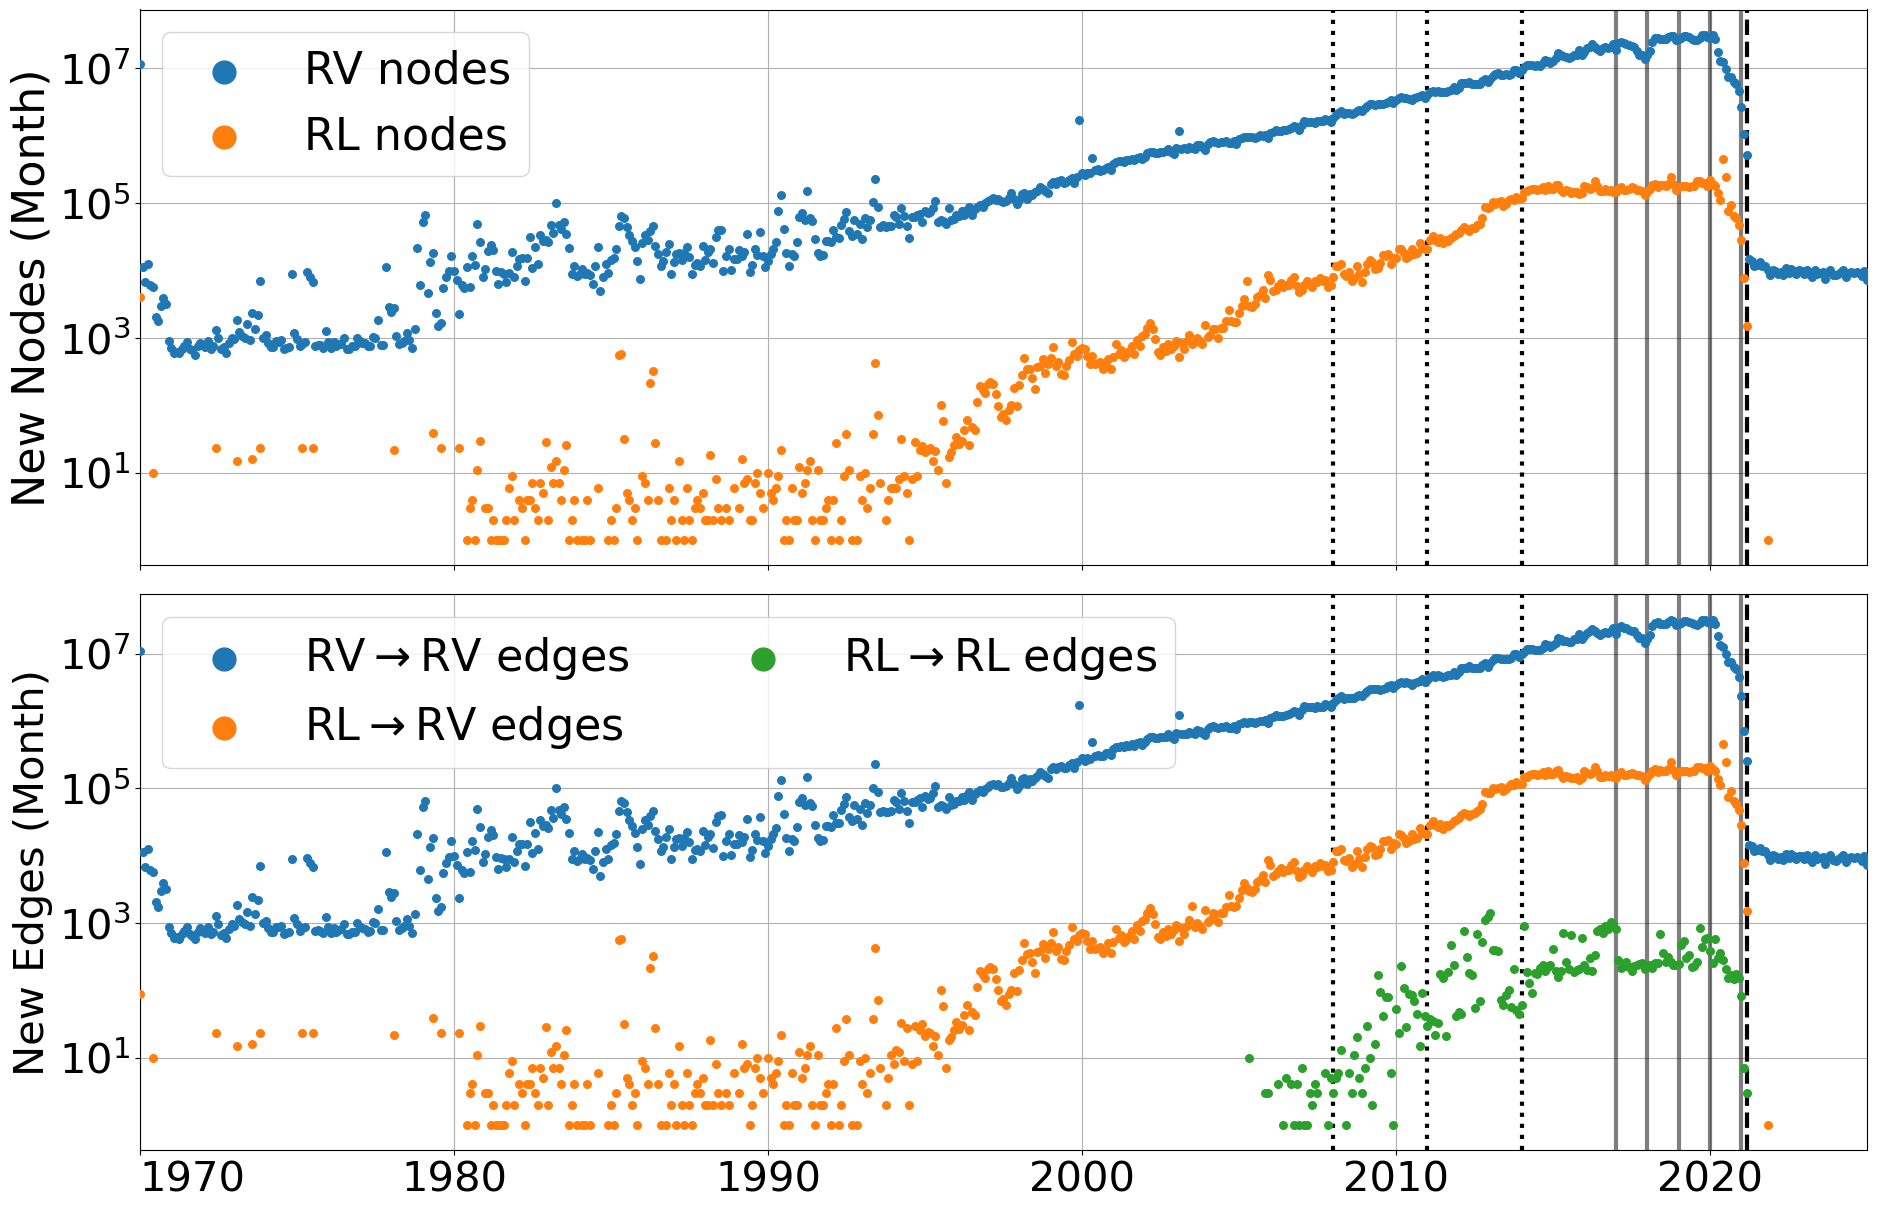

In [15]:
# python script
# ! image is saved in exportpath

Rebuild=True
Fsave=True
if Rebuild:
    stat=pickle.load(open(exportpath+"/stat_nodes_edges_1970_2030_20240517.pkl","rb"))

    nfig=2
    fontsize=32

    def verticalline(fig,axs):
            alpha=0.5
            lw=3
            for year in range(2017,2022):
                axs.axvline(x=year,color='k',alpha=alpha,lw=lw)
            axs.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
            for year in [2008,2011,2014]:
                axs.axvline(x=year+(1-1)/12,color='k',linestyle=':',alpha=1,lw=lw)

    def shiftlabels(fig,axs):
            xticklabels=axs.get_xticklabels()
            for i, label in enumerate(xticklabels):
                if i == 0:  
                    label.set_horizontalalignment('left')
                elif i == len(xticklabels) - 1:  
                    label.set_horizontalalignment('right')
                else:  
                    label.set_horizontalalignment('center')

    x=1970+np.arange(1634)/12

    fig, axs = plt.subplots(nfig,figsize=(18,6*nfig),sharex=True)   
    plt.tight_layout()
    for i in range(nfig):
        axs[i].set_xlim(1970,2025)
        axs[i].grid()

    for sourcetype in ["RV","RL"]:
        if ">" not in sourcetype and np.sum(stat[sourcetype])!=0 and sourcetype!="O":
            axs[0].scatter(x,stat[sourcetype],s=30,zorder=10,label=sourcetype+" nodes")
    axs[0].legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=3)
    axs[0].set_yscale("log") 
    axs[0].tick_params(axis='both',which='major',labelsize=fontsize-2)
    axs[0].set_ylabel("New Nodes (Month)",fontsize=fontsize)
    verticalline(fig,axs[0])
    shiftlabels(fig,axs[0])

    for sourcetype in ["RV>RV","RL>RV","RL>RL"]:
        if ">" in sourcetype and np.sum(stat[sourcetype])!=0:
            n1,n2=sourcetype.split(">")
            axs[1].scatter(x,stat[sourcetype],s=30,zorder=10,label=n1+r'$\to$'+n2+" edges")
    axs[1].legend(loc='upper left',fontsize=fontsize,ncol=2,markerscale=3)
    axs[1].set_yscale("log") 
    axs[1].tick_params(axis='both',which='major',labelsize=fontsize-2)
    axs[1].set_ylabel("New Edges (Month)",fontsize=fontsize-2)
    verticalline(fig,axs[1])
    shiftlabels(fig,axs[1])

    if Fsave:
        plt.savefig(exportpath+'/Figures/Nodes_Edges_1970_2030.png', format='png', dpi=300,bbox_inches='tight')
    plt.show()

## b) Topological Partioning ($RV\to RV$) (Fig. #4) 


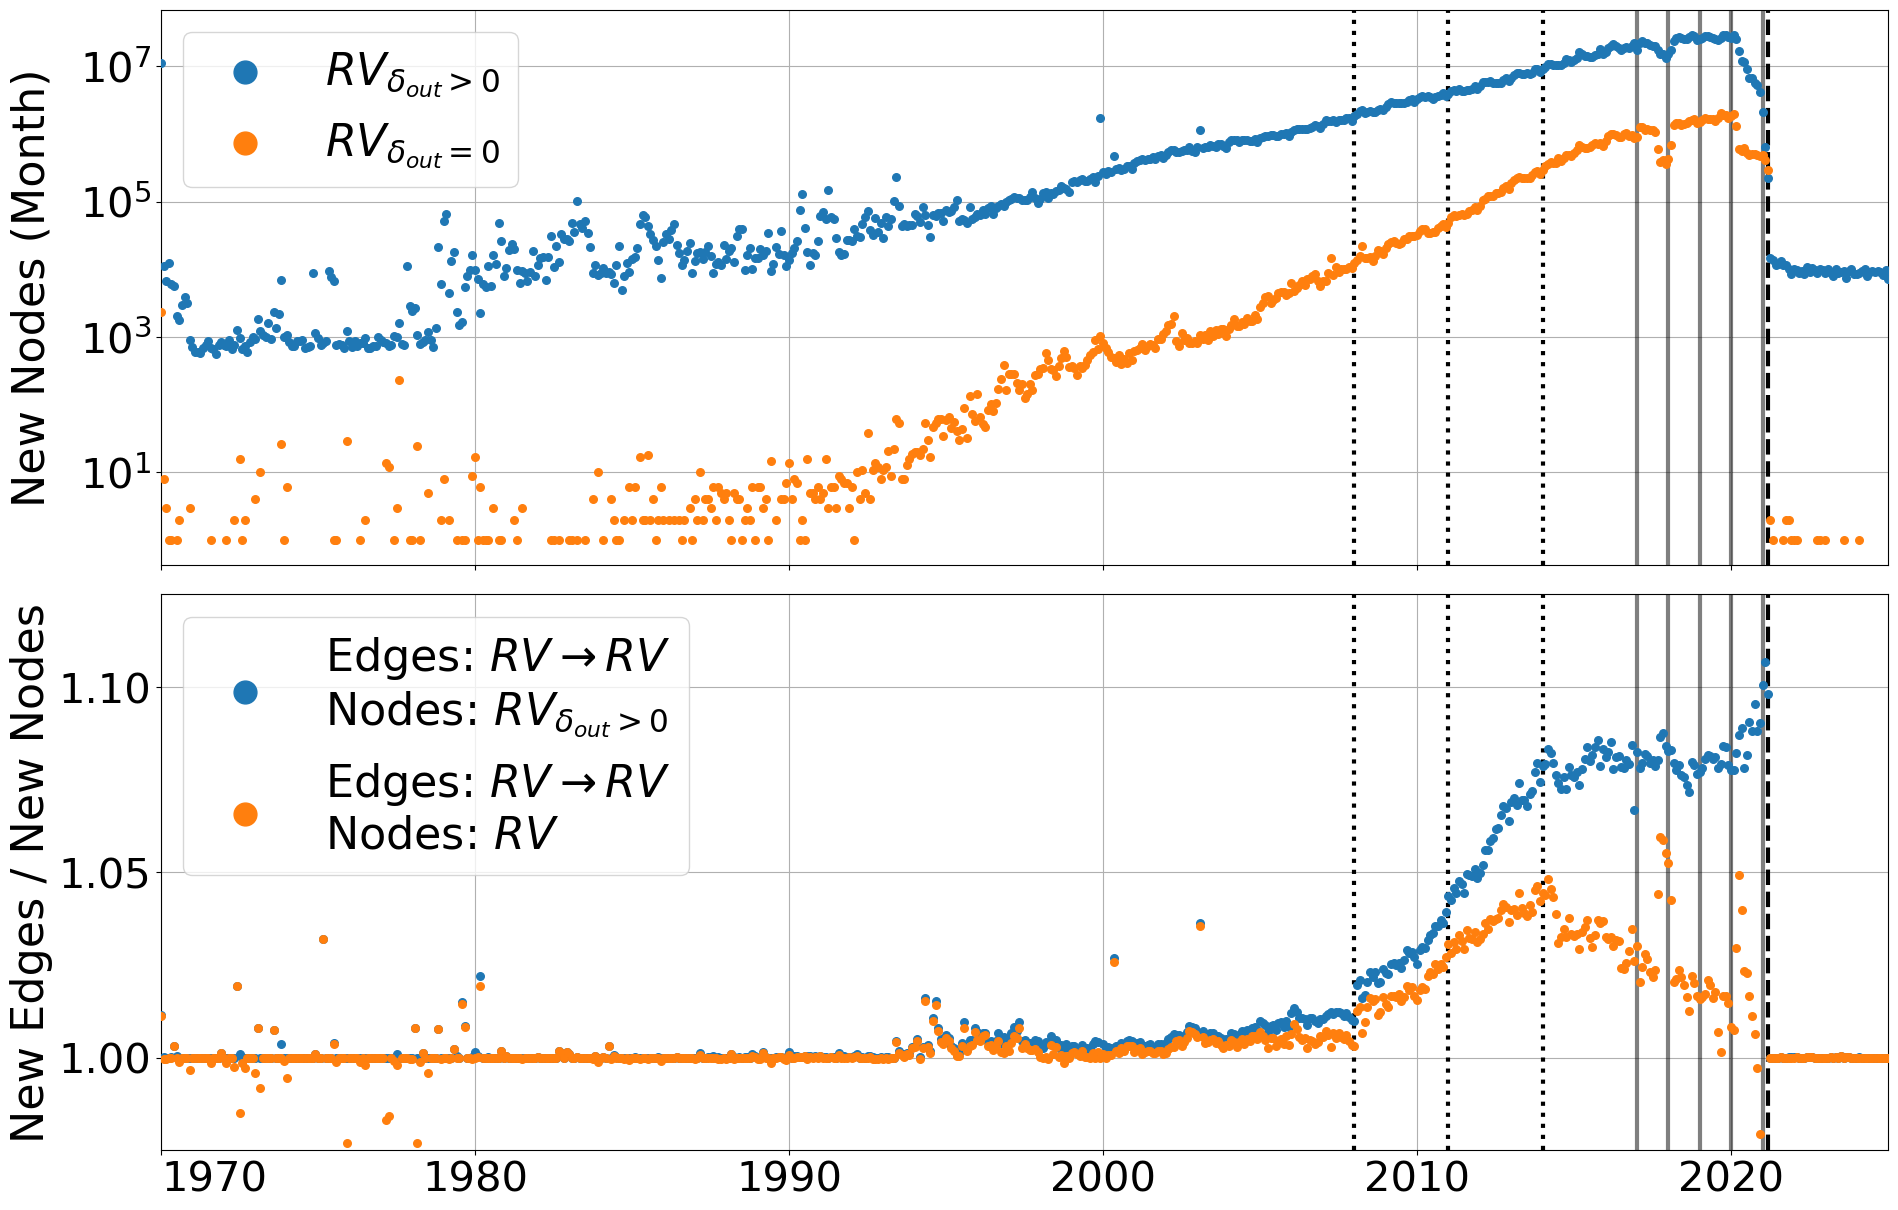

In [24]:
# python script 
# ! image is saved in exportpath

Rebuild=True
Fsave=True

if Rebuild:
    outdegree_RV_RV_month=pickle.load(open(exportpath+"outdegree_RV_RV_month_1970_2030_20240917.pkl","rb"))

    def verticalline(fig,axs):
            alpha=0.5
            lw=3
            for year in range(2017,2022):
                axs.axvline(x=year,color='k',alpha=alpha,lw=lw)
            axs.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
            for year in [2008,2011,2014]:
                axs.axvline(x=year+(1-1)/12,color='k',linestyle=':',alpha=1,lw=lw)

    def shiftlabels(fig,axs):
            xticklabels=axs.get_xticklabels()
            for i, label in enumerate(xticklabels):
                if i == 0:  
                    label.set_horizontalalignment('left')
                elif i == len(xticklabels) - 1:  
                    label.set_horizontalalignment('right')
                else:  
                    label.set_horizontalalignment('center')    

    RV_0=outdegree_RV_RV_month["nodes_dout==0"]
    RV_1plus=outdegree_RV_RV_month["nodes_dout>=1"]
    RV_RV=outdegree_RV_RV_month["edges_dout>=0"]

    datearray=1970+np.arange(1634)/12 # month since epoch to year+mont/12 (month in [0,11])

    nfig=2
    fontsize=32

    fig, axs = plt.subplots(nfig,figsize=(18,6*nfig),sharex=True)   

    plt.tight_layout()
    for i in range(nfig):
        axs[i].set_xlim(1970,2025)
        axs[i].grid()


    axs[0].scatter(datearray,RV_1plus,s=30,zorder=10,label=r'$RV_{\delta_{out}>0}$')
    axs[0].scatter(datearray,RV_0,s=30,zorder=10,label=r'$RV_{\delta_{out}=0}$')
    axs[0].legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=3)
    axs[0].tick_params(axis='both',which='major',labelsize=fontsize-2)
    axs[0].set_yscale("log") 
    axs[0].set_ylabel("New Nodes (Month)",fontsize=fontsize)

    verticalline(fig,axs[0])
    shiftlabels(fig,axs[0])

    axs[1].scatter(datearray,RV_RV/(RV_1plus),s=30,zorder=10,label=r'Edges: $RV{\to}RV$'+'\n'+r'Nodes: $RV_{\delta_{out}>0}$')
    axs[1].scatter(datearray,RV_RV/(RV_0+RV_1plus),s=30,zorder=10,label=r'Edges: $RV{\to}RV$'+'\n'+r'Nodes: $RV$')
    axs[1].legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=3)
    axs[1].set_ylim(0.975,1.125)
    axs[1].tick_params(axis='both',which='major',labelsize=fontsize-2)
    #axs[1].set_ylabel(r'$\frac{\rm New~Edges}{\rm New~Nodes}$',fontsize=fontsize)
    axs[1].set_ylabel('New Edges / New Nodes',fontsize=fontsize)

    verticalline(fig,axs[1])
    shiftlabels(fig,axs[1])
    fig.align_ylabels(axs)
    if Fsave:
        plt.savefig(exportpath+'/Figures/RatioRVRV_1970_2030.png', format='png', dpi=300,bbox_inches='tight')

    plt.show()

## c) In/Out Degree distribution over time (Fig. #6)


LOAD  ./ExportData/degreeInOutHisto_TT_O-O_BigO_TSL_Month_1980_2025_20250524.pkl
dout.keys() dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])
din.keys()  dict_keys(['010>101', '010>111', '011>101', '011>111', '111>101', '111>111'])


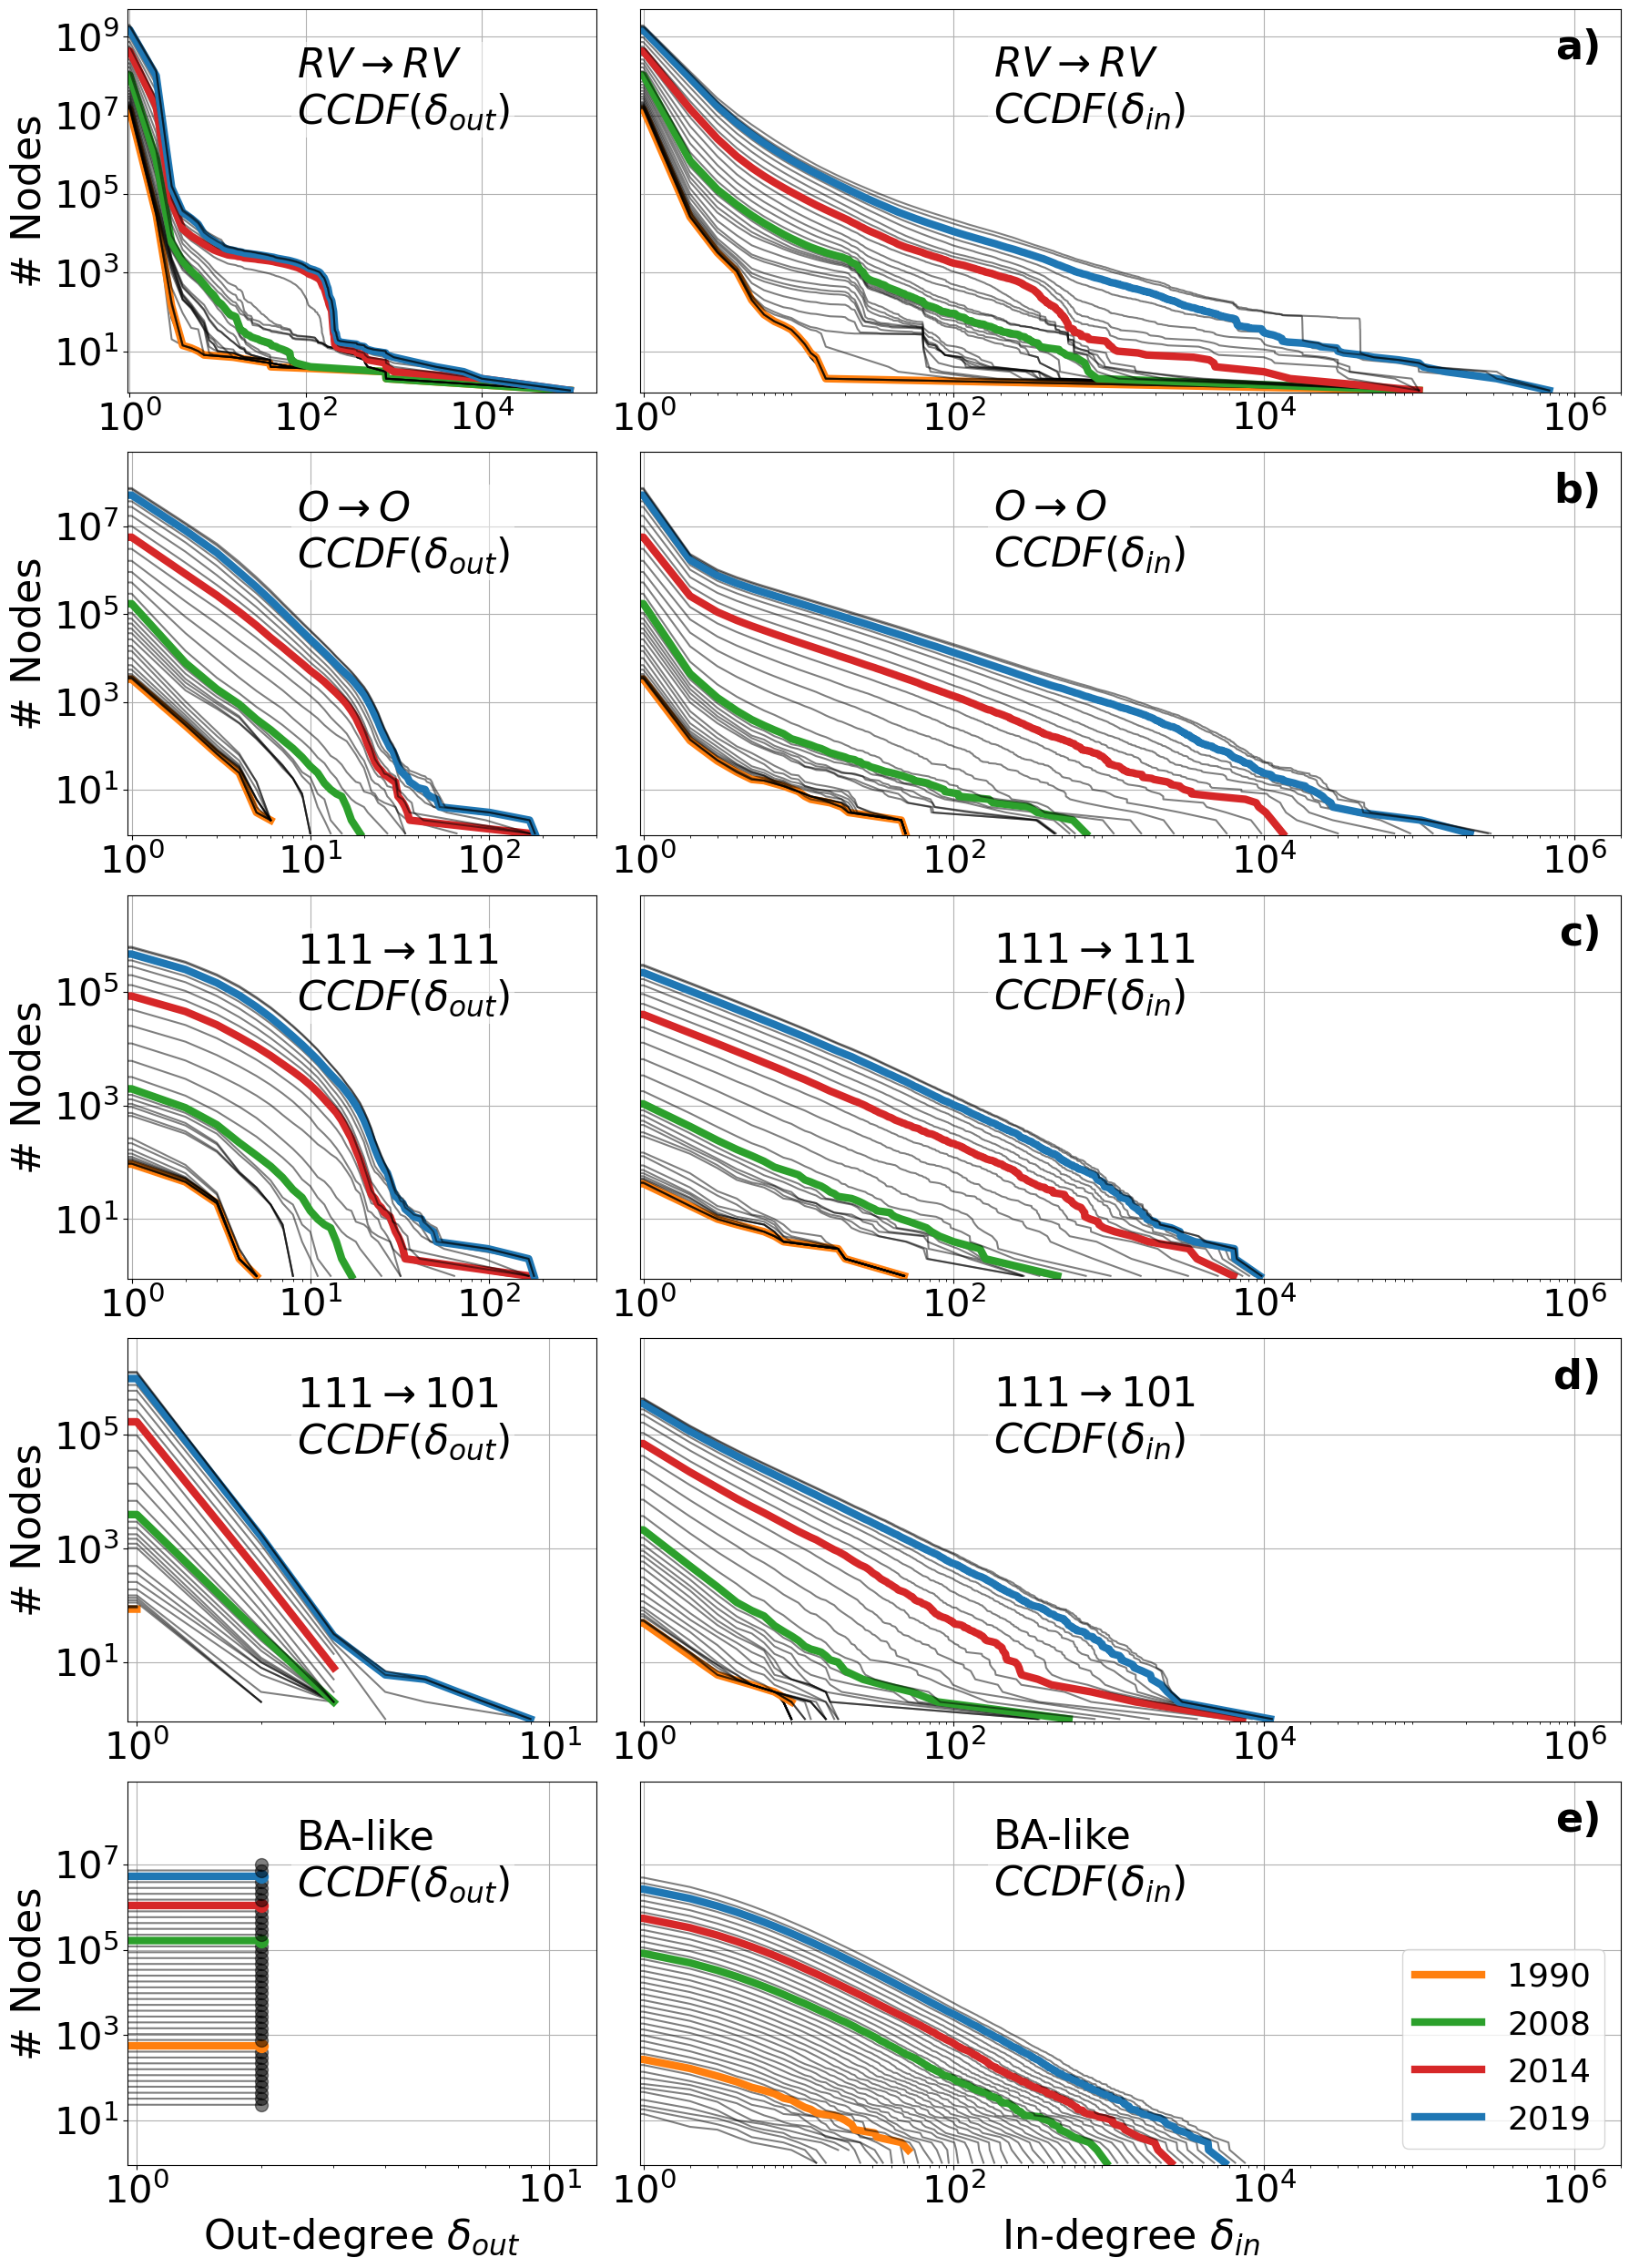

In [11]:
# python script 
# ! image is saved in exportpath

Rebuild=True
Fsave=True

if Rebuild:    
    nfig=5
    fontsize=32
    fig = plt.figure(figsize=(18, 5*nfig))  # Taille de la figure
    ax=(nfig*2)*[None]
    ax[0] = plt.subplot2grid((nfig, 3), (0, 0), rowspan=1,colspan=1,sharey=None,sharex=None)  # 1er sous-graphique, 1/3 de la largeur
    ax[2] = plt.subplot2grid((nfig, 3), (1, 0), rowspan=1,colspan=1,sharey=None,sharex=None)  # 3e sous-graphique, 1/3 de la largeur
    ax[4] = plt.subplot2grid((nfig, 3), (2, 0), rowspan=1,colspan=1,sharey=None,sharex=None)  # 5e sous-graphique, 1/3 de la largeur
    ax[6] = plt.subplot2grid((nfig, 3), (3, 0), rowspan=1,colspan=1,sharey=None,sharex=None)  # 5e sous-graphique, 1/3 de la largeur
    ax[8] = plt.subplot2grid((nfig, 3), (4, 0), rowspan=1,colspan=1,sharey=None,sharex=None)  # 5e sous-graphique, 1/3 de la largeur

    ax[9] = plt.subplot2grid((nfig, 3), (4, 1), rowspan=1,colspan=2,sharey=ax[8])  # 6e sous-graphique, 2/3 de la largeur
    ax[7] = plt.subplot2grid((nfig, 3), (3, 1), rowspan=1,colspan=2,sharey=ax[6],sharex=ax[9])  # 6e sous-graphique, 2/3 de la largeur
    ax[5] = plt.subplot2grid((nfig, 3), (2, 1), rowspan=1,colspan=2,sharey=ax[4],sharex=ax[9])  # 6e sous-graphique, 2/3 de la largeur
    ax[3] = plt.subplot2grid((nfig, 3), (1, 1), rowspan=1,colspan=2,sharey=ax[2],sharex=ax[9])  # 4e sous-graphique, 2/3 de la largeur
    ax[1] = plt.subplot2grid((nfig, 3), (0, 1), rowspan=1,colspan=2,sharey=ax[0],sharex=ax[9])  # 2e sous-graphique, 2/3 de la largeur

    ax[0].tick_params(bottom=True, labelbottom=True,labelsize=fontsize-2)
    ax[1].tick_params(left=False, labelleft=False,bottom=True, labelbottom=True,labelsize=fontsize-2)
    ax[2].tick_params(labelsize=fontsize-2)
    ax[3].tick_params(left=False, labelleft=False,labelsize=fontsize-2)
    ax[4].tick_params(labelsize=fontsize-2)
    ax[5].tick_params(left=False, labelleft=False,labelsize=fontsize-2)
    ax[6].tick_params(labelsize=fontsize-2)
    ax[7].tick_params(left=False, labelleft=False,labelsize=fontsize-2)
    ax[8].tick_params(labelsize=fontsize-2)
    ax[9].tick_params(left=False, labelleft=False,labelsize=fontsize-2)


    for axtmp in ax:
        axtmp.grid()
        axtmp.set_yscale("log")
        axtmp.set_xscale("log")
    for i in range(0,10,2):
        ax[i].set_ylabel("# Nodes",fontsize=fontsize)
    ax[8].set_xlabel("Out-degree "+r'$\delta_{out}$',fontsize=fontsize)
    ax[9].set_xlabel("In-degree "+r'$\delta_{in}$',fontsize=fontsize)
        
    xmin=nfig*2*[0.95]
    xmax=[2e5,   2e6,
          4e2,   2e6,
          4e2,   2e6,
          1.3e1, 2e6,
          1.3e1, 2e6]
    
    ymin=nfig*2*[0.9]
    
    ymax=[5e9, 5e9,
          5e8, 5e8,
          5e6, 5e6,
          5e6, 5e6,
          9e8, 9e8]
    
    ax[0].set_xticks([1e0,1e2,1e4])    
    ax[2].set_xticks([1e0,1e1,1e2])    
    ax[4].set_xticks([1e0,1e1,1e2])  
    ax[6].set_xticks([1e0,1e1])  
    ax[8].set_xticks([1e0,1e1])  
        
    ax[9].set_xticks([1e0,1e2,1e4,1e6])
       
    for i in range(2*nfig):
        ax[i].set_xlim(xmin[i],xmax[i])

    # position du text
    xtp=10**(np.log10(xmin)+0.36*(np.log10(xmax)-np.log10(xmin)))
    ytp=10**(np.log10(ymin)+0.7*(np.log10(ymax)-np.log10(ymin)))
    
    #xtp=10**(np.log10(xmax)-1)
    #ytp=10**(np.log10(ymax)-1)
    
    ax[0].set_ylim(ymin[0],ymax[0])
    ax[2].set_ylim(ymin[2],ymax[2])
    ax[4].set_ylim(ymin[4],ymax[4])
    ax[6].set_ylim(ymin[6],ymax[6])
    ax[8].set_ylim(ymin[8],ymax[8])


    labels = ['a)', 'b)', 'c)','d)','e)']
    for i,label in enumerate(labels):
        iax=2*i+1
        ax[iax].text(0.98, 0.95, label, transform=ax[iax].transAxes,fontsize=fontsize, fontweight='bold', va='top', ha='right') 

    
    markersize=0.5
    lw=6


    tdeltain=r'$CCDF(\delta_{in})$'
    tdeltaout=r'$CCDF(\delta_{out})$'
    
    #first line
    version="20250524"
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_year_1980_2025_"+version+".pkl","rb"))
    field,key=('ccdf',"ccdf")
    YearList=[1990,2008,2014,2019]
    ColorList=["tab:orange","tab:green","tab:red","tab:blue"]
    s="RV>RV"
    i=0;ax[i].text(xtp[i],ytp[i],r'$RV{\to}RV$'+'\n'+tdeltaout,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    i=1;ax[i].text(xtp[i],ytp[i],r'$RV{\to}RV$'+'\n'+tdeltain,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    for year in dout[s].keys():
        if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                ax[0].plot(dout[s][year]["x"],dout[s][year][key],markersize=markersize,c=c,lw=lw,label=str(year))
                ax[1].plot(din[s][year]["x"],din[s][year][key],markersize=markersize,c=c,lw=lw,label=str(year))
        elif year<2022:
                ax[0].plot(dout[s][year]["x"],dout[s][year][key],markersize=markersize,c="k",alpha=0.5)
                ax[1].plot(din[s][year]["x"],din[s][year][key],markersize=markersize,c="k",alpha=0.5)

    # second line

    InheritancePath="BigO"
    label="WITH Inheritance"
    version="20250524"
    filename=exportpath+"degreeInOutHisto_TT_O-O_BigO_year_1980_2025_"+version+".pkl"
    dout,din=pickle.load(open(filename,"rb"))
    field,key=('ccdf',"ccdf")
    s="O>O"
    i=2;ax[i].text(xtp[i],ytp[i],r'$O{\to}O$'+'\n'+tdeltaout,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    i=3;ax[i].text(xtp[i],ytp[i],r'$O{\to}O$'+'\n'+tdeltain,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

    for year in dout[s].keys():
        if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                ax[2].plot(dout[s][year]["x"],dout[s][year][key],markersize=markersize,c=c,lw=lw,label=str(year))
                ax[3].plot(din[s][year]["x"],din[s][year][key],markersize=markersize,c=c,lw=lw,label=str(year))
        elif year<2022:
                ax[2].plot(dout[s][year]["x"],dout[s][year][key],markersize=markersize,c="k",alpha=0.5)
                ax[3].plot(din[s][year]["x"],din[s][year][key],markersize=markersize,c="k",alpha=0.5)
    #ax4.legend(loc='upper right',fontsize=fontsize,ncol=1,markerscale=3)

    # third line
    
    InheritancePath="BigO"
    label="WITH Inheritance"
    version="20250524"
    filename=exportpath+"degreeInOutHisto_TT_O-O_"+InheritancePath+"_TSL_Month_1980_2025_"+version+".pkl"
    dout,din=pickle.load(open(filename,"rb"))
    print("LOAD ",filename)
    print("dout.keys()",dout.keys())
    print("din.keys() ",din.keys())
    field,key=('ccdf',"ccdf")
    s="111>111"
    i=4;ax[i].text(xtp[i],ytp[i],r'$111{\to}111$'+'\n'+tdeltaout,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    i=5;ax[i].text(xtp[i],ytp[i],r'$111{\to}111$'+'\n'+tdeltain,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

    for kmonth in dout[s].keys(): # ! month
        if kmonth%12==0: 
            year=kmonth//12
            if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                ax[4].plot(dout[s][kmonth]["x"],dout[s][kmonth][key],markersize=markersize,c=c,lw=lw,label=str(year))
                ax[5].plot(din[s][kmonth]["x"],din[s][kmonth][key],markersize=markersize,c=c,lw=lw,label=str(year))
            elif year<2022:
                ax[4].plot(dout[s][kmonth]["x"],dout[s][kmonth][key],markersize=markersize,c="k",alpha=0.5)
                ax[5].plot(din[s][kmonth]["x"],din[s][kmonth][key],markersize=markersize,c="k",alpha=0.5)

    # fourth line
    s="111>101"
    i=6;ax[i].text(xtp[i],ytp[i],r'$111{\to}101$'+'\n'+tdeltaout,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    i=7;ax[i].text(xtp[i],ytp[i],r'$111{\to}101$'+'\n'+tdeltain,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
                
    for kmonth in dout[s].keys(): # ! month
        if kmonth%12==0: 
            year=kmonth//12
            if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                ax[6].plot(dout[s][kmonth]["x"],dout[s][kmonth][key],markersize=markersize,c=c,lw=lw,label=str(year))
                ax[7].plot(din[s][kmonth]["x"],din[s][kmonth][key],markersize=markersize,c=c,lw=lw,label=str(year))
            elif year<2022:
                ax[6].plot(dout[s][kmonth]["x"],dout[s][kmonth][key],markersize=markersize,c="k",alpha=0.5)
                ax[7].plot(din[s][kmonth]["x"],din[s][kmonth][key],markersize=markersize,c="k",alpha=0.5)

    
    # 5th line
    version="20250524"
    filename=exportpath+"degreeInOutHisto_TT_O-O_BA_Month_1980_2025_"+version+".pkl"
    dout,din=pickle.load(open(filename,"rb"))
    field,key=('ccdf',"ccdf")
    s="O>O"
    i=8;ax[i].text(xtp[i],ytp[i],r'BA-like'+'\n'+tdeltaout,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    i=9;ax[i].text(xtp[i],ytp[i],r'BA-like'+'\n'+tdeltain,fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

    for kmonth in dout[s].keys(): # ! month
        if kmonth%12==0: 
            year=kmonth//12
            if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                ax[8].plot(dout[s][kmonth]["x"],dout[s][kmonth][key],"-o",markersize=10,c=c,lw=lw,label=str(year))
                ax[9].plot(din[s][kmonth]["x"],din[s][kmonth][key],markersize=markersize,c=c,lw=lw,label=str(year))
            elif year<2022:
                ax[8].plot(dout[s][kmonth]["x"],dout[s][kmonth][key],"-o",markersize=10,c="k",alpha=0.5)
                ax[9].plot(din[s][kmonth]["x"],din[s][kmonth][key],markersize=markersize,c="k",alpha=0.5)
    ax[9].legend(loc='lower right',fontsize=fontsize-6,ncol=1,markerscale=2)
    
    plt.tight_layout()

    if Fsave:
        plt.savefig(exportpath+'/Figures/Merge_InOutDegree_OO_RVRV_top.png', format='png', dpi=300,bbox_inches='tight')
    plt.show()

    

## d) Scaling factor estimate (Fig. #8) 


./ExportData/stat_nodes_edges_O-O_BigO_ORI_1970_2030_20241008.pkl


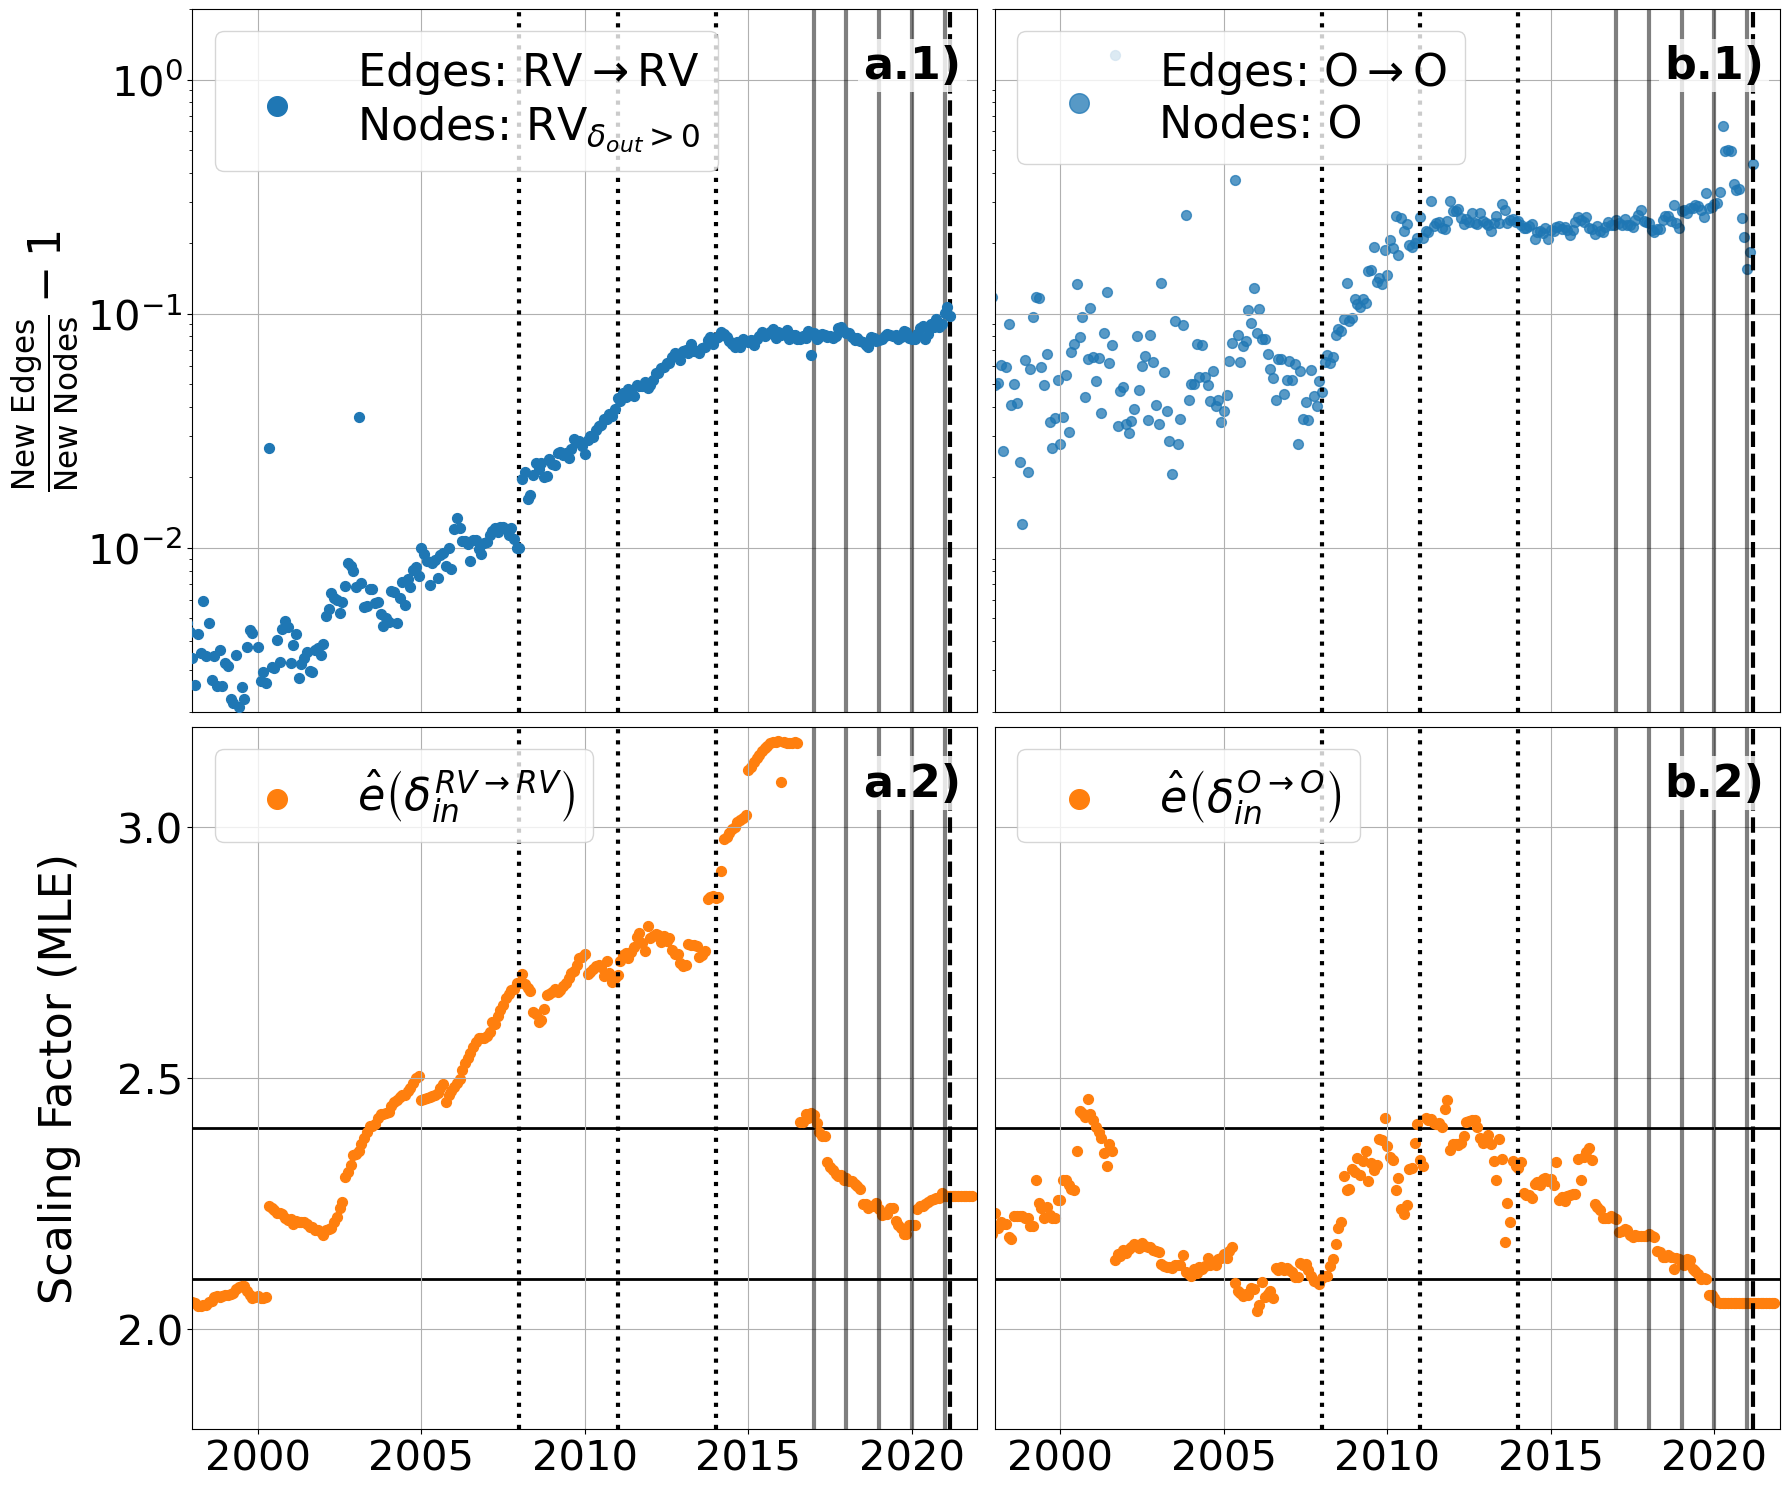

In [28]:
# python script 
# ! image is saved in exportpath

Rebuild=True
Fsave=True

if Rebuild:
    
    nfig=3
    fontsize=32

    fig = plt.figure(figsize=(18, 5*nfig))  # Taille de la figure

    ax4 = plt.subplot2grid((2, 2), (1, 0), colspan=1,sharey=None,sharex=None)
    ax3 = plt.subplot2grid((2, 2), (0, 0), colspan=1,sharey=None,sharex=ax4)
    ax6 = plt.subplot2grid((2, 2), (1, 1), colspan=1,sharey=ax4,sharex=None)
    ax5 = plt.subplot2grid((2, 2), (0, 1), colspan=1,sharey=ax3,sharex=ax6)

    #ax3.set_xticks([1980,1990,2000,2010,2020])    
    #ax4.set_xticks([2000,2005,2010,2015,2020])    
    #ax5.set_xticks([1980,1990,2000,2010,2020])    
    #ax6.set_xticks([2000,2005,2010,2015,2020])    


    
    # First line
    filename=exportpath+"stat_nodes_edges_O-O_BigO_ORI_1970_2030_20241008.pkl"
    print(filename)
    stat=pickle.load(open(filename,"rb"))
    
    # displaying all curves
    x=np.arange(1634)/12+1970
    def VerticalLinesLocal(axtmp):
        lw=3;alpha=0.5

        for year in [2017,2018,2019,2020,2021]:
            axtmp.axvline(x=year,color='k',alpha=alpha,lw=lw)
        axtmp.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        for year in [2008,2011,2014]:
            axtmp.axvline(x=year,color='k',linestyle=':',alpha=1,lw=lw)

    for key,value in stat.items():
        if np.sum(value[1:-1])!=0 and ">" in key:
            length=(len(key)-1)//2
            #labelname=key[-length:]+r'${\to}$'+key[-length:]+'/'+key[-length:]+"-1"
            labelname="Edges: "+key[-length:]+r'${\to}$'+key[-length:]+'\nNodes: '+key[-length:]
            ax5.scatter(x,value/stat[key[-length:]]-1,s=50,label=labelname,alpha=0.75)
            
    ax5.legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=2)
    ax5.set_yscale("log") 
    ax5.set_xlim(1998,2022)
    #ax5.tick_params(axis='both',which='both',labelsize=fontsize-2)
    ax5.tick_params(bottom=False,labelbottom=False,left=False,labelleft=False,labelsize=fontsize-2)
    ax5.grid()
    #ax5.set_ylabel("New Edges / New Nodes -1",fontsize=fontsize)

    outdegree_RV_RV_month=pickle.load(open(exportpath+"outdegree_RV_RV_month_1970_2030_20240917.pkl","rb"))
    datearray=1970+np.arange(1634)/12 
    #RV_0=outdegree_RV_RV_month["nodes_dout==0"]
    RV_1plus=outdegree_RV_RV_month["nodes_dout>=1"]
    RV_RV=outdegree_RV_RV_month["edges_dout>=0"]    
    #ax3.scatter(x,(RV_RV-RV_1plus)/(RV_1plus),s=50,zorder=10,label=r'RV${\to}$RV/RV$_{\delta_{out}>0}$-1')
    ax3.scatter(x,(RV_RV-RV_1plus)/(RV_1plus),s=50,zorder=10,label=r'Edges: RV${\to}$RV'+'\n'+r'Nodes: RV$_{\delta_{out}>0}$')
    ax3.legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=2)
    ax3.set_yscale("log")
    ax3.set_xlim(1998,2022)
    ax3.set_ylim(2e-3,2)
    ax3.set_ylabel(r'$\frac{\rm New~Edges}{\rm New~Nodes}-1$',fontsize=fontsize)
    #ax3.tick_params(axis='both',which='both',labelsize=fontsize-2)
    ax3.tick_params(bottom=False,labelbottom=False,labelsize=fontsize-2)
    ax3.grid()

    VerticalLinesLocal(ax5)
    VerticalLinesLocal(ax3)
    
    # fourth line

    xdate,x_min,e_x_min,D_max,Nnodes,Nedges=pickle.load(open(exportpath+"degreeInOutHisto_TT_O-O_BigO_Month_1980_2025_20241008.weightedKS_6_SL_True.ehat.pkl","rb"))
    ax6.scatter(xdate,e_x_min,s=50,c="tab:orange",label=r'$\hat{e}\left(\delta_{in}^{O{\to}O}\right)$')
    xdate,x_min,e_x_min,D_max,Nnodes,Nedges=pickle.load(open(exportpath+"degreeInOutHisto_TT_Month_1980_2025_20240924.weightedKS_6.ehat.pkl","rb"))
    ax4.scatter(xdate,e_x_min,s=50,c="tab:orange",label=r'$\hat{e}\left(\delta_{in}^{RV{\to}RV}\right)$')

    ax6.set_ylim(1.8,3.2)
    ax6.set_xlim(1998,2022)
    #ax6.tick_params(axis='both',which='both',labelsize=fontsize-2)
    ax6.tick_params(left=False,labelleft=False,labelsize=fontsize-2)
    ax6.legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=2)
    ax6.grid()
    VerticalLinesLocal(ax6)
    ax6.axhline(y=2.4,color='k',linestyle='-',alpha=1,lw=2,zorder=-10)
    ax6.axhline(y=2.1,color='k',linestyle='-',alpha=1,lw=2,zorder=-10)

    ax4.set_ylim(1.8,3.2)
    ax4.set_xlim(1998,2022)
    ax4.tick_params(axis='both',which='both',labelsize=fontsize-2)
    ax4.set_yticks([2,2.5,3])    
    ax4.set_ylabel(r'Scaling Factor (MLE)',fontsize=fontsize)
    ax4.legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=2)
    ax4.grid()
    VerticalLinesLocal(ax4)
    ax4.axhline(y=2.4,color='k',linestyle='-',alpha=1,lw=2,zorder=-10)
    ax4.axhline(y=2.1,color='k',linestyle='-',alpha=1,lw=2,zorder=-10)

    bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)    
    ax3.text(0.98, 0.95, 'a.1)', transform=ax3.transAxes,
             fontsize=fontsize, fontweight='bold', va='top', ha='right',bbox=bbox,zorder=10) 
    ax4.text(0.98, 0.95, 'a.2)', transform=ax4.transAxes,
             fontsize=fontsize, fontweight='bold', va='top', ha='right',bbox=bbox,zorder=10) 
    ax5.text(0.98, 0.95, 'b.1)', transform=ax5.transAxes,
             fontsize=fontsize, fontweight='bold', va='top', ha='right',bbox=bbox,zorder=10) 
    ax6.text(0.98, 0.95, 'b.2)', transform=ax6.transAxes,
             fontsize=fontsize, fontweight='bold', va='top', ha='right',bbox=bbox,zorder=10) 

    plt.tight_layout()
    fig.align_ylabels([ax3, ax4])
    if Fsave:
        plt.savefig(exportpath+'/Figures/Merge_InOutDegree_OO_RVRV_bottom.png', format='png', dpi=300,bbox_inches='tight')
    plt.show()


## e) Histograms of edge timestamp differences (Fig. #7)


In [12]:
# python script 
# ! image is saved in exportpath

Rebuild=True
Fsave=True



In [13]:
if Rebuild:
    # O/RL/RV-RL/RV graph
    # ! can take few minutes (should be less than 10)
    nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName =LoadAllArray()
    arraytype,encoding,sourcearrayTS,targetarrayTS,deltaTS=GetEdgeTs(nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH=EPOCH)
    del nodes,edges,nodesad

Loaded : ./ImportData/nodes_20240310.pkl
Loaded : ./ImportData/edges_20240310.pkl
Loaded : ./ImportData/nodesad_20240310.pkl
Loaded : ./ImportData/d_20240310.pkl
DatasetName SWH derived (O/RL/RV)-(RL/RV)
DatasetDescription Zenodo Deposit 10.5281/zenodo.15260640
DatasetDoi 10.5281/zenodo.15260640
From EPOCH 1970-01-01
--------------------------------------------------------------------------------
Edge Source/Target TS Building  58.51 (s)
Mask Building  4.75 (s)
2,124,356,958 valid edges over a total of 3,841,679,043 i.e. 55.3 % of valid edges
--------------------------------------------------------------------------------
Building DeltaTS  8.96 (s)
Applying Mask  26.85 (s)
Building edge type array and applying mask 20.79 (s)
--------------------------------------------------------------------------------


In [14]:
if Rebuild:
    # Derived O-(RL/RV)-O graph
    nodesOO,edgesOO,nodesadOO,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArray_OO(keypath="BigO")
    arraytypeOO,encodingOO,sourcearrayTSOO,targetarrayTSOO,deltaTSOO=GetEdgeTs(nodesOO,edgesOO,nodesadOO,d,Nnodes,Nedges,EPOCH=EPOCH)
    
    print('Unvalid edges are mainly orgin nodes without release or revision nodes after partitioning for which nodesad=2^32-1')
    #nodesOO,edgesOO,nodesad,d,Nnodes,Nedges
    arraytypeTSL,encodingTSL,sourcearrayTSTSL,targetarrayTSTSL,deltaTSTSL=GetEdgeTs(nodesOO,edgesOO,nodesadOO,d,Nnodes,Nedges,EPOCH=EPOCH,depth=1)
    del nodesOO,edgesOO,nodesadOO

Loaded : nodes_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : edges_o_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : nodesadderived_derived_O-RVRL-O_BigO_20240429.pkl
Loaded : ./ImportData/d_o_derived_O-RVRL-O_BigO_20240429.pkl
DatasetName SWH derived O-[RV/RL]-O
DatasetDescription Zenodo Deposit 10.5281/zenodo.15260640
DatasetDoi 10.5281/zenodo.15260640
From EPOCH 1970-01-01
--------------------------------------------------------------------------------
Edge Source/Target TS Building  2.03 (s)
Mask Building  0.11 (s)
95,293,525 valid edges over a total of 156,682,302 i.e. 60.82 % of valid edges
--------------------------------------------------------------------------------
Building DeltaTS  1.28 (s)
Applying Mask  0.94 (s)
Building edge type array and applying mask 0.68 (s)
--------------------------------------------------------------------------------
Unvalid edges are mainly orgin nodes without release or revision nodes after partitioning for which nodesad=2^32-1
--------------------

In [15]:
if Rebuild:
    n=int(1e6) # number of nodes
    m=2 # number of new edges per new nodes
    SelfLoop=True
    nodesBA,edgesBA,NnodesBA,NedgesBA,SelfLoopBA=BarabasiAlbertGraph(n,m,Verbose=True,seed=42,SelfLoop=SelfLoop)
    dBA=SetParamsBA_d(NnodesBA)
    nodesadBA=SetParamsBA_nodesad(NnodesBA)
    arraytypeBA,encodingBA,sourcearrayTSBA,targetarrayTSBA,deltaTSBA=GetEdgeTs(nodesBA,edgesBA,nodesadBA,dBA,NnodesBA,NedgesBA)


Elapse 1.2147791385650635
--------------------------------------------------------------------------------
Edge Source/Target TS Building  0.02 (s)
Mask Building  0.0 (s)
3,000,000 valid edges over a total of 3,000,000 i.e. 100.0 % of valid edges
--------------------------------------------------------------------------------
Building DeltaTS  0.01 (s)
Applying Mask  0.02 (s)
Building edge type array and applying mask 0.01 (s)
--------------------------------------------------------------------------------


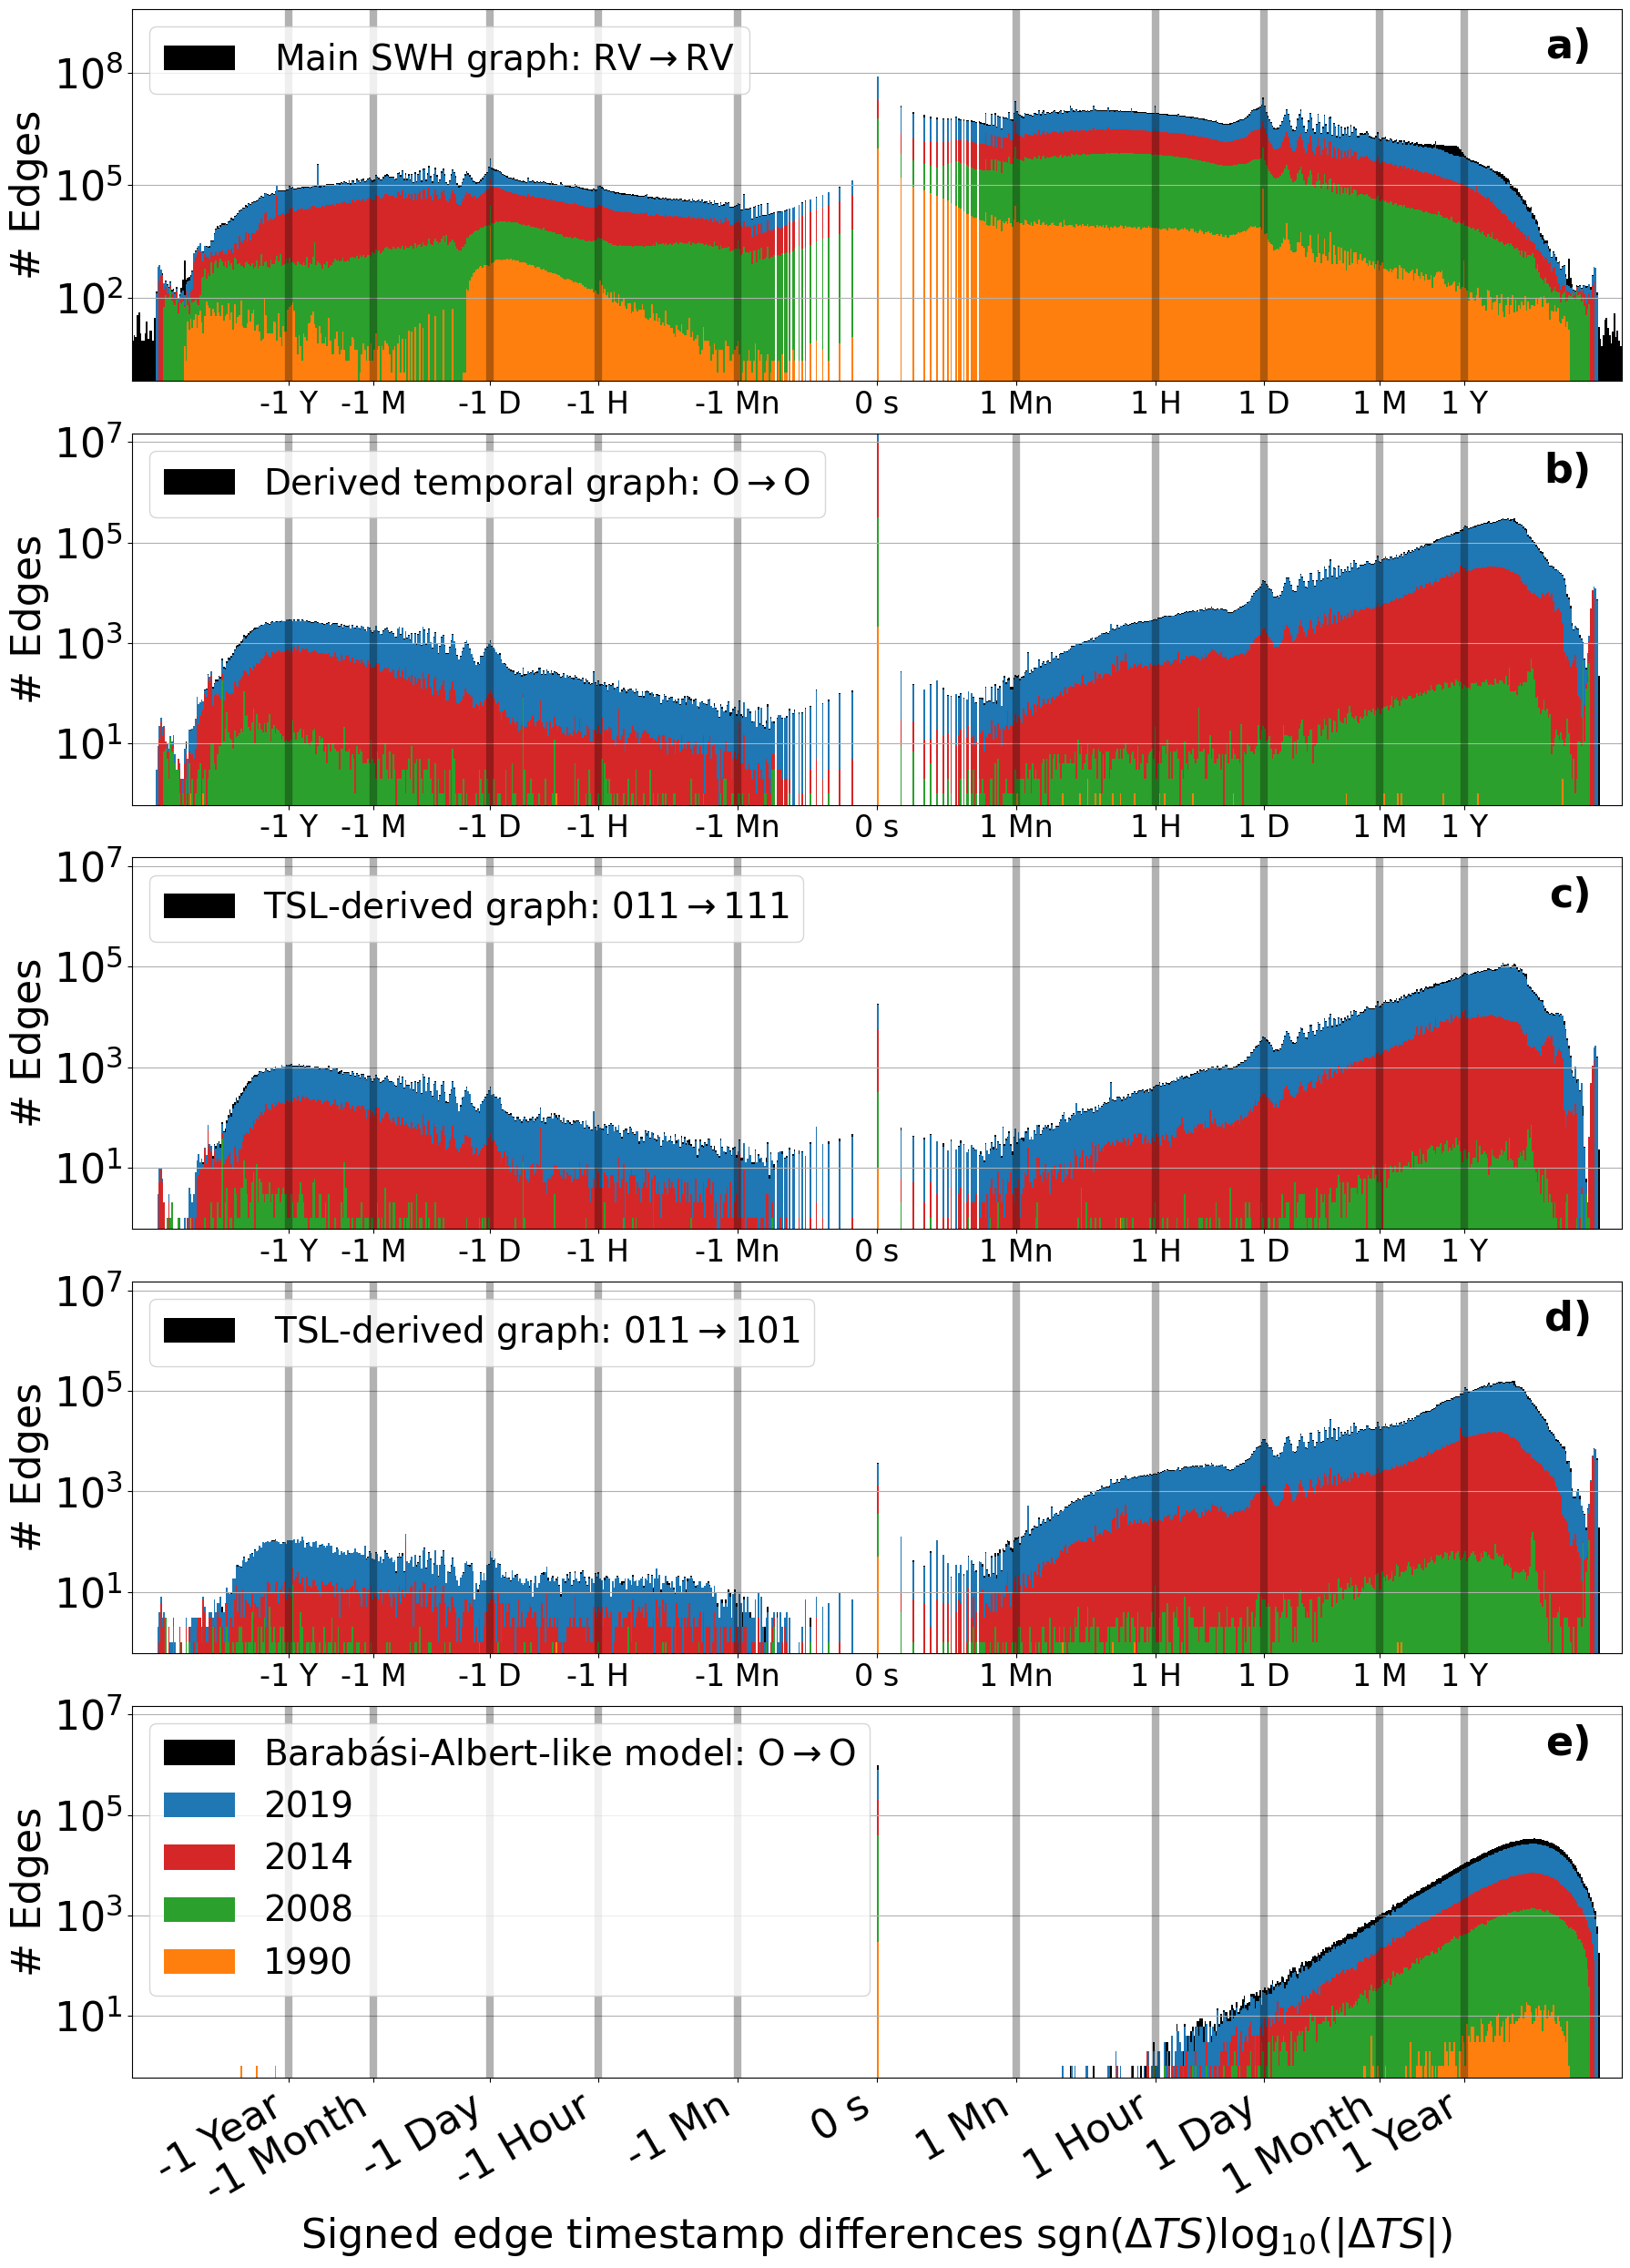

In [18]:
# python script 
# ! image is saved in exportpath
if Rebuild:
    
    nfig=5
    fontsize=32
    lw=6


    mn=60;hour=60*60;day=24*hour;week=7*day;year=365*day;month=year/12
    x=np.arange(1634)/12+1970
    
    fig = plt.figure(figsize=(18, 5*nfig))  # Taille de la figure
    #string1=r'Histograms of the signed edge timestamp differences $\operatorname{sgn}(\Delta TS){\rm Log}_{10}(|\Delta TS|)$'
    string1=r'Signed edge timestamp differences $\operatorname{sgn}(\Delta TS){\rm log}_{10}(|\Delta TS|)$'
    #string2='Vertical black lines : -1Year/-1Week/-1Days/-1Hour/-1mn/0s/1mn/1Hour/1Day/1Week/1Year'
    #plt.title(string1+'\n'+string2,fontsize=fontsize-4)

    #plt.title("Edge Type :"+Etype+"\n ")

    
    ax=nfig*[None]

    ax[0] = plt.subplot2grid((nfig, 3), (0, 0),colspan=3)  
    ax[1] = plt.subplot2grid((nfig, 3), (1, 0),colspan=3)  
    ax[2] = plt.subplot2grid((nfig, 3), (2, 0),colspan=3)  
    ax[3] = plt.subplot2grid((nfig, 3), (3, 0),colspan=3)  
    ax[4] = plt.subplot2grid((nfig, 3), (4, 0),colspan=3)  


    #ax[0].set_title(string1,fontsize=fontsize)
    ax[4].set_xlabel(string1,fontsize=fontsize)

    xticks=[-np.log10(year),-np.log10(month),-np.log10(day),-np.log10(hour),-np.log10(mn),0,
            np.log10(mn),np.log10(hour),np.log10(day),np.log10(month),np.log10(year)]

    xtick_labels = ['-1 Y','-1 M','-1 D','-1 H','-1 Mn','0 s','1 Mn','1 H','1 D','1 M','1 Y']
    for i in range(nfig-1):
        ax[i].tick_params(left=True, labelleft=True,bottom=True, labelbottom=True,labelsize=fontsize)
        ax[i].set_xticks(xticks)    
        ax[i].set_xticklabels(xtick_labels,fontsize=24,ha='center')    

        
    xtick_labels = ['-1 Year','-1 Month','-1 Day','-1 Hour','-1 Mn','0 s','1 Mn','1 Hour','1 Day','1 Month','1 Year']
    ax[nfig-1].set_xticks(xticks)    
    ax[nfig-1].set_xticklabels(xtick_labels,fontsize=28,rotation=30,ha='right')    
    ax[nfig-1].tick_params(left=True, labelleft=True,bottom=True, labelbottom=True,labelsize=fontsize)

    labels = ['a)', 'b)', 'c)','d)','e)']
    for iax,label in enumerate(labels):
        ax[iax].text(0.98, 0.95, label, transform=ax[iax].transAxes,fontsize=fontsize, fontweight='bold', va='top', ha='right') 

    for axtmp in ax:
        axtmp.grid(axis='y')
        axtmp.set_yscale("log")
        #axtmp.set_xscale("log")

    xmin=nfig*[-9.5]
    xmax=nfig*[9.5]
    ymin=nfig*[0.6]
    ymax=[5e9,1.5e7,1.5e7,1.5e7,1.5e7]
    YEARlist=[(2019,"tab:blue"),(2014,"tab:red"),(2008,"tab:green"),(1990,"tab:orange")]
    YEARColorList=[]
      
    for i in range(nfig):
        ax[i].set_xlim(xmin[i],xmax[i])
        ax[i].set_ylim(ymin[i],ymax[i])
        
    for iax,encodingTmp,arraytypeTmp,targetarrayTStmp,sourcearrayTStmp,deltaTSTmp,EtypeTmp,model in [
        (0,encoding,arraytype,targetarrayTS,sourcearrayTS,deltaTS,'RV>RV',' Main SWH graph'),
        (1,encodingOO,arraytypeOO,targetarrayTSOO,sourcearrayTSOO,deltaTSOO,'O>O','Derived temporal graph'),
        (2,encodingTSL,arraytypeTSL,targetarrayTSTSL,sourcearrayTSTSL,deltaTSTSL,'011>111','TSL-derived graph'),
        #(3,encodingTSL,arraytypeTSL,targetarrayTSTSL,sourcearrayTSTSL,deltaTSTSL,'111>111',' TSL graph'),
        (3,encodingTSL,arraytypeTSL,targetarrayTSTSL,sourcearrayTSTSL,deltaTSTSL,'011>101',' TSL-derived graph'),
        (4,encodingBA,arraytypeBA,targetarrayTSBA,sourcearrayTSBA,deltaTSBA,'O>O','Barabási-Albert-like model'),
]:
        i=np.where(np.array(encodingTmp)==EtypeTmp)[0][0]
        mask_type=arraytypeTmp==i 
        typed_deltaTS=deltaTSTmp[mask_type]
        h=np.where(typed_deltaTS==0,0,np.sign(typed_deltaTS)*np.log10(np.abs(typed_deltaTS)))
        # fixed bins and range, density=False
        if '>' in EtypeTmp:
            labelname=model+': '+EtypeTmp.split('>')[0]+r'${\to}$'+EtypeTmp.split('>')[1]
        else:
            labelname=model+': '+EtypeTmp
        ax[iax].hist(h,bins=1000,range=(-10,10),density=False,log=True,label=labelname,alpha=1,color="k") #black
        
        # per year with the same color code as the one used for the in/out degree
        for YEAR,color in YEARlist:
            mask_type=arraytypeTmp==i         
            mask_type=np.logical_and(mask_type,np.maximum(targetarrayTStmp,sourcearrayTStmp)<=(YEAR+1-1970)*12)
            typed_deltaTS=deltaTSTmp[mask_type]
        
            h=np.where(typed_deltaTS==0,0,np.sign(typed_deltaTS)*np.log10(np.abs(typed_deltaTS)))
            if iax==4:
                ax[iax].hist(h,bins=1000,range=(-10,10),density=False,log=True,alpha=1,color=color,label=str(YEAR))
            else:
                ax[iax].hist(h,bins=1000,range=(-10,10),density=False,log=True,alpha=1,color=color)
            
        ax[iax].legend(loc="upper left",fontsize=fontsize-4,ncol=1,markerscale=1)
        # vertical line 1mn, 1H, 1D,1M,1Y
        for xv in [mn,day,hour,month,year]:
            ax[iax].axvline(x=np.log10(xv),color='k',alpha=0.3,lw=lw)
            ax[iax].axvline(x=-np.log10(xv),color='k',alpha=0.3,lw=lw)
    for i in range(5):
        ax[i].set_ylabel("# Edges",fontsize=fontsize)
        
    plt.tight_layout()

    if Fsave:
        plt.savefig(exportpath+'Figures/Merge_EdgeAges.png', format='png', dpi=300,bbox_inches='tight')
    plt.show()

    

## f) APS Citation Dataset Report (Fig. #9)


Loaded : ./ImportData/nodes_APS_20250618.pkl
Loaded : ./ImportData/edges_APS_20250618.pkl
Loaded : ./ImportData/nodesad_APS_20250618.pkl
Loaded : ./ImportData/d_APS_20250618.pkl
DatasetName APS derived P-P
DatasetDescription From APS 2022
DatasetDoi 
From EPOCH 1900-01-01
--------------------------------------------------------------------------------
Edge Source/Target TS Building  0.07 (s)
Mask Building  0.0 (s)
9,757,851 valid edges over a total of 9,757,851 i.e. 100.0 % of valid edges
--------------------------------------------------------------------------------
Building DeltaTS  0.03 (s)
Applying Mask  0.1 (s)
Building edge type array and applying mask 0.01 (s)
--------------------------------------------------------------------------------


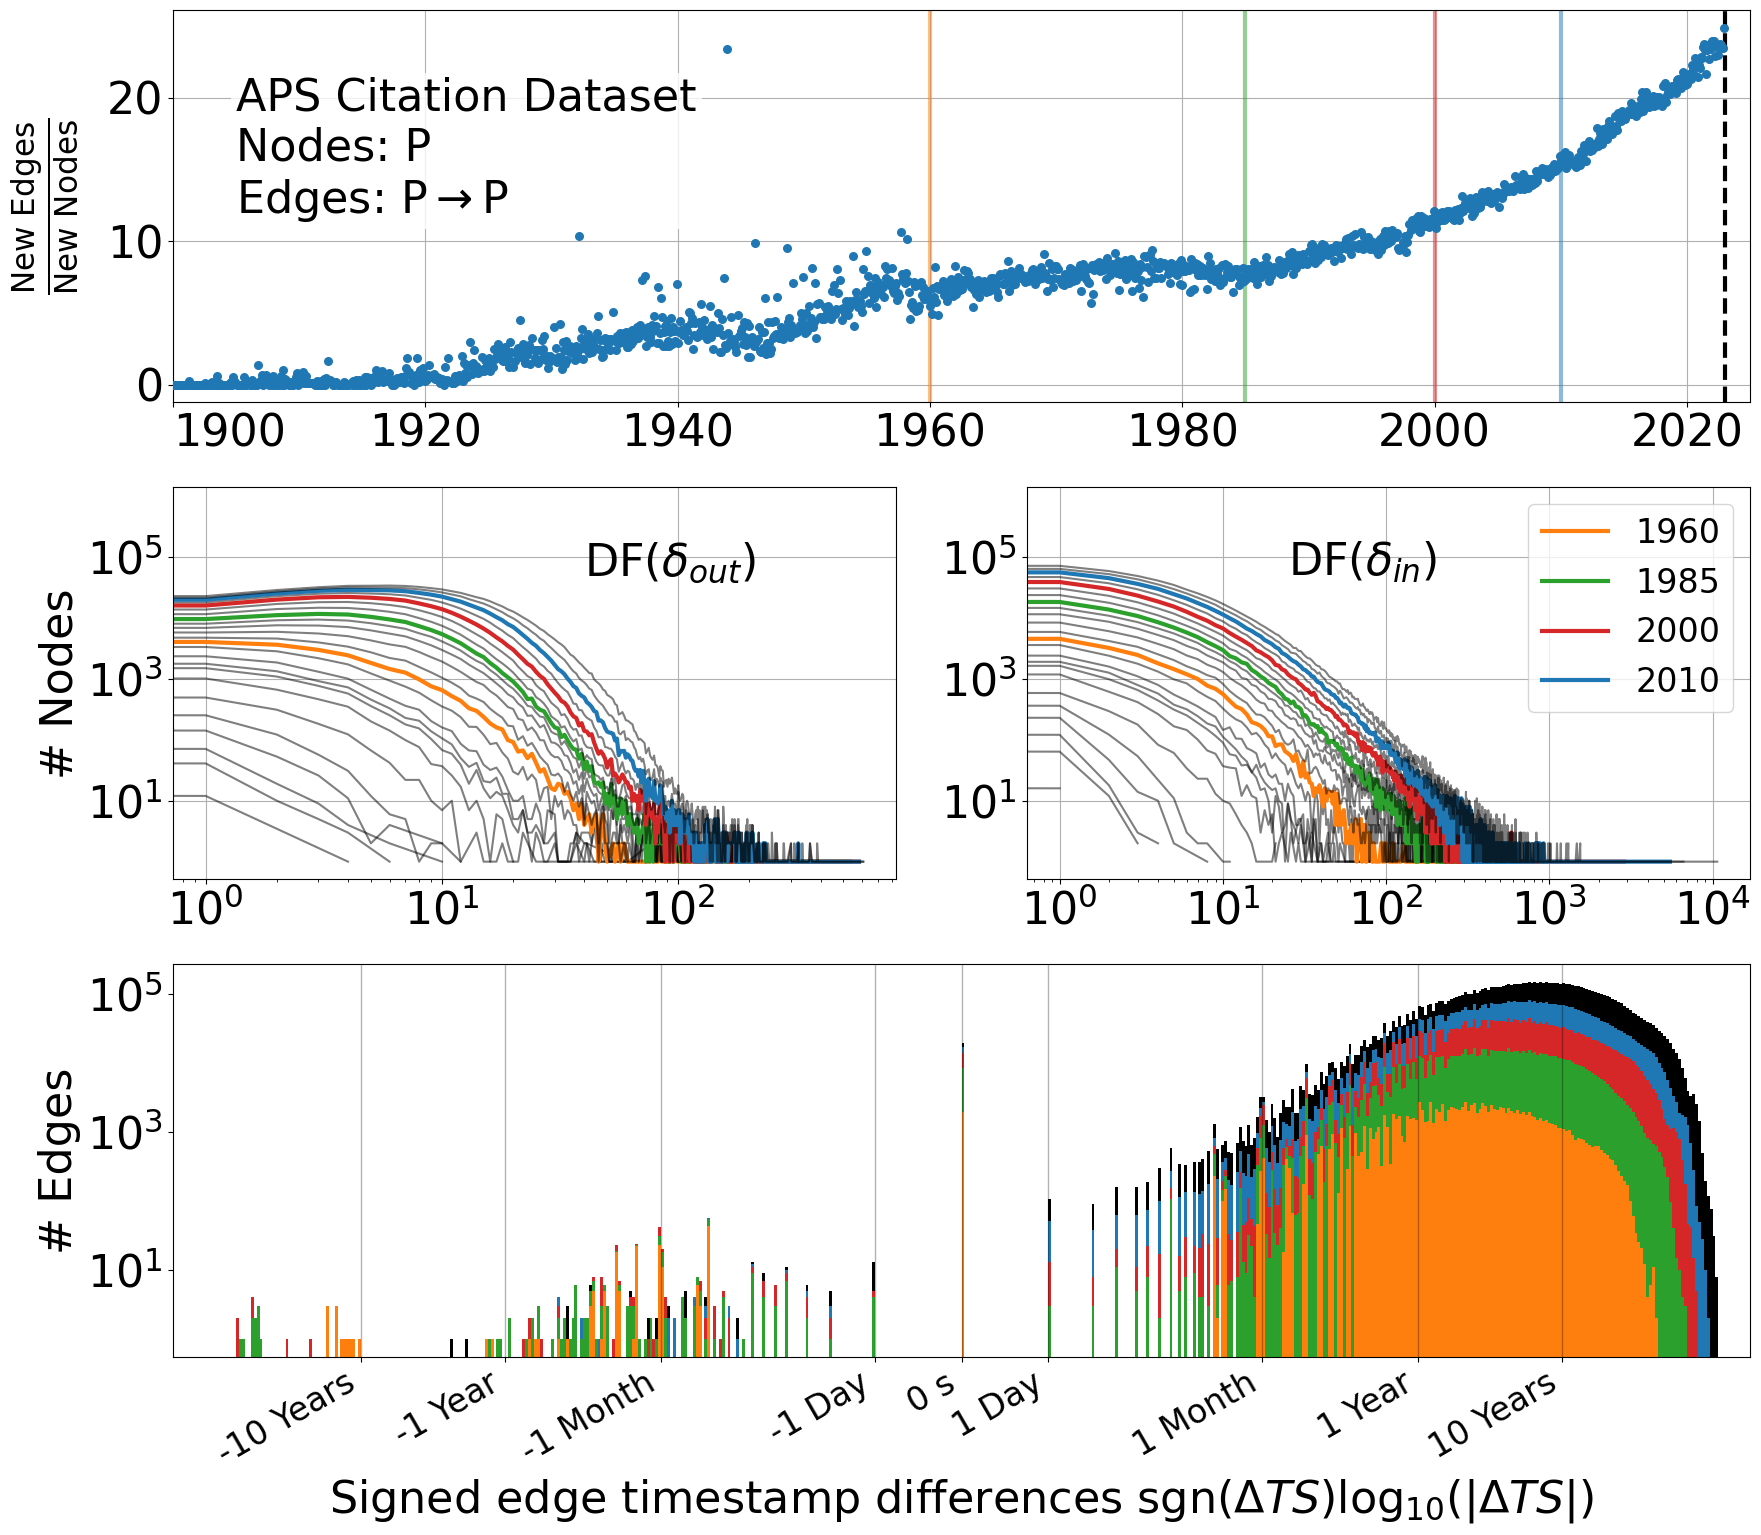

In [22]:
# python script
# ! image is saved in exportpath

Rebuild=True
Fsave=True
if Rebuild:
    
    nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArrayAPS() 
    arraytype,encoding,sourcearrayTS,targetarrayTS,deltaTS=GetEdgeTs(nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH=EPOCH)
    
    stat=pickle.load(open(exportpath+"/stat_nodes_edges_APS_1900_2030.pkl","rb"))
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_APS_year_1900_2030.pkl","rb"))
    
    markersize=0.5
    fontsize=32
    lw=3
    Tmn=60;Thour=60*60;Tday=24*Thour;Tweek=7*Tday;Tyear=365*Tday;Tmonth=Tyear//12
    
    x=1900+np.arange(1634)/12

    nfig=3
    
    YEARlist=[(2010,"tab:blue"),(2000,"tab:red"),(1985,"tab:green"),(1960,"tab:orange")]
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)    

    
    def verticalline(fig,axs,YEARlist):
            alpha=0.5
            #for year in []:
            #    axs.axvline(x=year,color='k',alpha=alpha,lw=lw)
            axs.axvline(x=2023+(1-1)/12,color='k',linestyle='--',alpha=1,lw=3)
            for year,color in YEARlist:
                axs.axvline(x=year+(1-1)/12,color=color,linestyle='-',alpha=0.5,lw=3)

    def shiftlabels(fig,axs):
            xticklabels=axs.get_xticklabels()
            for i, label in enumerate(xticklabels):
                if i == 0:  
                    label.set_horizontalalignment('left')
                elif i == len(xticklabels) - 1:  
                    label.set_horizontalalignment('right')
                else:  
                    label.set_horizontalalignment('center')

    YearList=[year for year,color in YEARlist]
    ColorList=[color for year,color in YEARlist]


    fig = plt.figure(figsize=(18, 5*nfig))  # Taille de la figure
    string1=r'Histograms of the signed edge timestamp differences $\operatorname{sgn}(\Delta TS){\rm log}_{10}(|\Delta TS|)$'
    #string2='Vertical black lines : -1Year/-1Week/-1Days/-1Hour/-1mn/0s/1mn/1Hour/1Day/1Week/1Year'
    #plt.title(string1+'\n'+string2,fontsize=fontsize-4)

    #plt.title("Edge Type :"+Etype+"\n ")

    
    ax=(nfig+1)*[None]

    ax[0] = plt.subplot2grid((nfig, 4), (0, 0),colspan=4)  
    ax[0].set_ylabel(r'$\frac{\rm New~Edges}{\rm New~Nodes}$',fontsize=fontsize)
    ax[1] = plt.subplot2grid((nfig, 4), (1, 0),colspan=2)  
    ax[1].set_ylabel('# Nodes',fontsize=fontsize)
    ax[2] = plt.subplot2grid((nfig, 4), (1, 2),colspan=2)  
    
    ax[3] = plt.subplot2grid((nfig, 4), (2, 0),colspan=4)  
    ax[3].set_xlabel(r'Signed edge timestamp differences $\operatorname{sgn}(\Delta TS){\rm log}_{10}(|\Delta TS|)$',fontsize=fontsize)
    ax[3].set_ylabel('# Edges',fontsize=fontsize)

    for i in range(4):
        ax[i].tick_params(axis='both',which='major',labelsize=fontsize)

    
    #fig, axs = plt.subplots(nfig,figsize=(18,6*nfig),sharex=True)   
    plt.tight_layout()
    ax[0].set_xlim(1900,2025)
    ax[0].grid()

    #ax[0].scatter(x,stat["P>P"]/stat["P"],s=30,zorder=10,label=r'P${\to}$P edges / P nodes')
    ax[0].scatter(x,stat["P>P"]/stat["P"],s=30,zorder=10)
    #ax[0].legend(loc='center left',fontsize=fontsize,ncol=1,markerscale=3)
    ax[0].text(1905,12,'APS Citation Dataset\nNodes: P\n'+r'Edges: P${\to}$P',fontsize=fontsize,bbox=bbox)

    #ax[0].set_yscale("log") 
    
    verticalline(fig,ax[0],YEARlist=YEARlist)
    shiftlabels(fig,ax[0])
    
    s="P>P"
    # ccdf or df
    if False:
        field,key=('ccdf',"ccdf")
    else:
        field,key=('df',"y")

    ax[2].text(2.5*10**1,0.5*10**5,field.upper()+r'$(\delta_{in})$',fontsize=fontsize)
    ax[1].text(4*10**1,0.5*10**5,field.upper()+r'$(\delta_{out})$ ',fontsize=fontsize)
    for i in [1,2]:
        ax[i].set_yscale("log")
        ax[i].set_xscale("log")
        ax[i].grid()


    for year in dout[s].keys():
        if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                ax[1].plot(dout[s][year]["x"],dout[s][year][key],markersize=markersize,c=c,lw=lw,label=str(year))
                ax[2].plot(din[s][year]["x"],din[s][year][key],markersize=markersize,c=c,lw=lw,label=str(year))
        elif year<2022:
                ax[1].plot(dout[s][year]["x"],dout[s][year][key],markersize=markersize,c="k",alpha=0.5)
                ax[2].plot(din[s][year]["x"],din[s][year][key],markersize=markersize,c="k",alpha=0.5)

    ax[2].legend(loc='upper right',fontsize=fontsize-8,ncol=1,markerscale=1)

    for iax,encodingTmp,arraytypeTmp,targetarrayTStmp,sourcearrayTStmp,deltaTSTmp,EtypeTmp,model in [
        (3,encoding,arraytype,targetarrayTS,sourcearrayTS,deltaTS,'P>P',' APS Citation Dataset'),
       
]:
        shift=Tday/4
        i=np.where(np.array(encodingTmp)==EtypeTmp)[0][0]
        mask_type=arraytypeTmp==i 
        typed_deltaTS=deltaTSTmp[mask_type]
        h=np.where(typed_deltaTS==0,0,np.sign(typed_deltaTS)*np.log10(np.abs(typed_deltaTS)/shift))
        # fixed bins and range, density=False
        if '>' in EtypeTmp:
            labelname=model+': '+EtypeTmp.split('>')[0]+r'${\to}$'+EtypeTmp.split('>')[1]
        else:
            labelname=model+': '+EtypeTmp
        ax[iax].hist(h,bins=int(1000/20*(20-2*np.log10(shift))),range=(-10+np.log10(shift),10-np.log10(shift)),density=False,log=True,label=labelname,alpha=1,color="k") #black
        
        # per year with the same color code as the one used for the in/out degree
        for YEAR,color in YEARlist:
            mask_type=arraytypeTmp==i         
            mask_type=np.logical_and(mask_type,np.maximum(targetarrayTStmp,sourcearrayTStmp)<=(YEAR+1-1900)*12)
            typed_deltaTS=deltaTSTmp[mask_type]
        
            # Values are shiffted by an half day since the difference equals or is at leats a one day
            h=np.where(typed_deltaTS==0,0,np.sign(typed_deltaTS)*np.log10(np.abs(typed_deltaTS)/shift))
            #if iax==4:
            #    ax[iax].hist(h,bins=1000,range=(-10,10),density=False,log=True,alpha=1,color=color,label=str(YEAR))
            #else:
            ax[iax].hist(h,bins=int(1000/20*(20-2*np.log10(shift))),range=(-10+np.log10(shift),10-np.log10(shift)),density=False,log=True,alpha=1,color=color)
            
        #ax[iax].legend(loc="upper left",fontsize=fontsize-4,ncol=1,markerscale=1)
        bbox=dict(facecolor='white', edgecolor='none')#, boxstyle='round,pad=0.2')
        #ax[iax].text(-8.5+np.log10(shift),4*10**2,model+"\n\n"+r' $\operatorname{sgn}(\Delta TS){\rm Log}_{10}(|\Delta TS|)$',fontsize=fontsize+2,bbox=bbox)
        #ax[iax].text(-9.5+np.log10(shift),1*10**3,r'$\operatorname{sgn}(\Delta TS){\rm Log}_{10}(|\Delta TS|)$',fontsize=fontsize+2,bbox=bbox)
        
        xticks=[-np.log10(10*Tyear/shift),-np.log10(Tyear/shift),-np.log10(Tmonth/shift),-np.log10(Tday/shift),
                #-np.log10(Thour/shift),-np.log10(Tmn/shift),
                0,
                #np.log10(Tmn/shift),np.log10(Thour/shift),
                np.log10(Tday/shift),np.log10(Tmonth/shift),np.log10(Tyear/shift),np.log10(10*Tyear/shift)]
   
        xtick_labels = ['-10 Years','-1 Year','-1 Month','-1 Day',
                        #'-1 Hour','-1 Mn',
                        '0 s',
                        #'1 Mn','1 Hour',
                        '1 Day','1 Month','1 Year','10 Years']
  
        ax[iax].set_xticks(xticks)    
        ax[iax].set_xticklabels(xtick_labels,rotation=30,ha='right',fontsize=fontsize-8)    
    
        ax[iax].set_xlim(-9.8+np.log10(shift),9.8-np.log10(shift))
        for xv in xticks:
            ax[iax].axvline(x=xv,color='k',alpha=0.3,lw=1)
    fig.align_ylabels([ax[0],ax[1],ax[3]])        
    if Fsave:
        plt.savefig(exportpath+'/Figures/Nodes_Edges_APS_1900_2030.png', format='png', dpi=300,bbox_inches='tight')
    plt.show()

## g) APS Citation outdegree distribution fit (Fig. #10) 

Loaded : ./ImportData/nodes_APS_20250618.pkl
Loaded : ./ImportData/edges_APS_20250618.pkl
Loaded : ./ImportData/nodesad_APS_20250618.pkl
Loaded : ./ImportData/d_APS_20250618.pkl
DatasetName APS derived P-P
DatasetDescription From APS 2022
DatasetDoi 
From EPOCH 1900-01-01


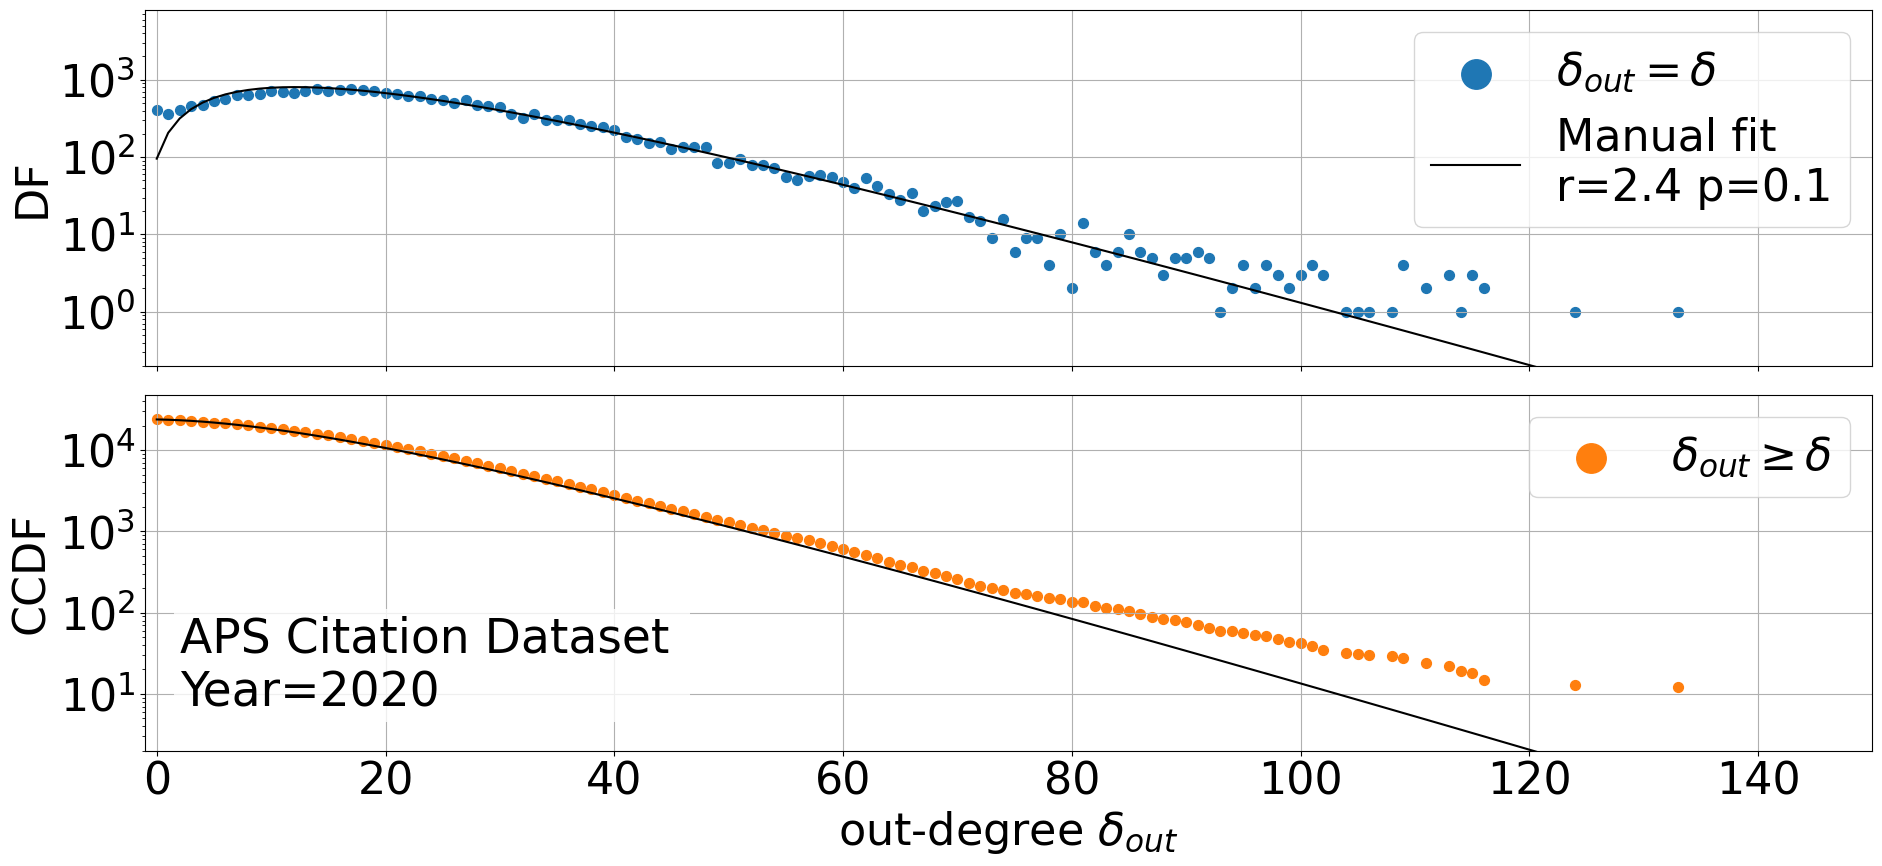

In [11]:
Fsave=True
Rebuild=True
if Rebuild:
    from scipy.special import gammaln,betainc

    def BinomialNegative_I(x,r,p,N=1):
        return N*np.exp(gammaln(x+r-1+1)-gammaln(x+1)-gammaln(r-1+1))*(1-p)**x*p**r
    
    def CCDF_BinomialNegative_I(x,r,p,N=1):
        return N-N*betainc(r,x+1,p)

    nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArrayAPS() 
    nodesTSM=timestampsarray2yearmonth(nodesad,EPOCH=EPOCH)
    dout=nodes[1:]-nodes[:-1]

    # negative binomial coefficient
    # manually fitted parameter
    r=2.4
    p=0.1
    DeltaMonth=6 # mean over 1+2xDeltaMonth
    year=2020
    
    mask=np.logical_and(
            nodesTSM>=max(0,int(6+12*(year-EPOCH2Epoch(EPOCH)))-DeltaMonth),
            nodesTSM<=int(6+12*(year-EPOCH2Epoch(EPOCH)))+DeltaMonth)
    
    Nhisto=np.bincount(dout[mask])
    x=np.arange(len(Nhisto))
    mask=Nhisto!=0
    x=x[mask]
    y=Nhisto[mask]
    Ntot=np.sum(y)

    # figure generation
    nfig=2
    fontsize=32
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)    

    fig, axs = plt.subplots(nfig,figsize=(18,4*nfig),sharex=True)   
    plt.tight_layout()
    for i in range(nfig):
        axs[i].set_xlim(-1,150)
        axs[i].grid()
        axs[i].tick_params(axis='both',which='major',labelsize=fontsize)

         
    #axs[0].title(r' P($\delta_{out}$) Year='+str(year)+"\n Negative binomial distribution : r="+str(r)+" p="+str(p) )
    c="k"
    axs[0].scatter(x,y,label=r'$\delta_{out}=\delta$',s=50,alpha=1)
    axs[0].plot(x,BinomialNegative_I(x,r,p,N=Ntot),label="Manual fit\n"+r'r=2.4 p=0.1',c=c,alpha=1)
    axs[0].set_yscale("log")
    axs[0].set_ylim(0.2,Ntot/3)
    axs[0].legend(loc='upper right',fontsize=fontsize,ncol=1,markerscale=3)
    #axs[0].set_ylabel('$\delta_{out}= \delta$ (Nodes)',fontsize=fontsize)
    axs[0].set_ylabel(r'DF',fontsize=fontsize)


  
    #axs[1].title(r'  CCDF($\delta_{out}$) Year='+str(year)+"\n Negative binomial distribution : r="+str(r)+" p="+str(p) )
    axs[1].scatter(x,np.cumsum(y[::-1])[::-1],c='tab:orange',label=r'$\delta_{out}\geq \delta$',s=50,alpha=1)
    axs[1].plot(x,CCDF_BinomialNegative_I(x,r,p,N=Ntot),c=c,alpha=1)
    axs[1].set_yscale("log")
    axs[1].set_ylim(2,Ntot*2)
    axs[1].legend(loc='upper right',fontsize=fontsize,ncol=1,markerscale=3)
    axs[1].text(2,7,'APS Citation Dataset \nYear=2020',fontsize=fontsize+2,bbox=bbox)
    axs[1].set_xlabel(r'out-degree $\delta_{out}$',fontsize=fontsize)
    #axs[1].set_ylabel('$\delta_{out}\leq \delta$ (Nodes)',fontsize=fontsize)
    axs[1].set_ylabel(r'CCDF',fontsize=fontsize)
    if Fsave:
        plt.savefig(exportpath+'/Figures/APS_dout_year=2020.png', format='png', dpi=300,bbox_inches='tight')
    plt.show()